# A utilização da Ciência de Dados como agente atenuante das desfavoráveis condições educacionais nas escolas do estado da Bahia

## DESCRIÇÃO DO PROJETO
Nesse projeto, farei uma análise exploratória de dados (EDA) a respeito as condições educacionais nas escolas do estado da Bahia, buscando observar fatores relevantes para o desenvolvimento do projeto, bem como formular hipóteses que possam servir como possíveis soluções para os problemas encontrados durante a análise. As ferramentas que eu estarei utilizando neste projeto serão a linguagem de programação Python - bem como suas bibliotecas, como Matplotlib, Seaborn, Numpy e Pandas. Quando juntas, tais ferramentas citadas possuem o poder de trabalhar com matrizes, bem como criar e manipular tabelas e gráficos de maneira dinâmica e satisfatória.

## CONTEXTUALIZAÇÃO
O sistema educacional da Bahia enfrenta desafios que vêm de longe e que ainda dificultam o avanço da educação pública. Apesar de algumas melhorias, como o aumento do acesso ao ensino básico e médio, problemas como escolas com estrutura precária, falta de materiais didáticos e a desvalorização dos professores continuam presentes. Em muitas regiões, especialmente nas áreas rurais e periféricas, as dificuldades vão além da sala de aula: transporte escolar inadequado, falta de internet e ambientes pouco propícios para o aprendizado ainda são obstáculos diários. Além disso, a evasão e a repetência continuam altas, mostrando que é preciso ir além do básico para garantir que os alunos realmente aprendam e permaneçam na escola. Outro ponto crítico é a formação dos professores, que carece de investimentos para que possam adotar metodologias mais inovadoras e inclusivas. Para mudar esse cenário, é essencial que as políticas públicas não se limitem a resolver problemas estruturais, mas também valorizem a diversidade cultural da Bahia e as particularidades de cada região, construindo um sistema educacional mais justo e eficiente.

Nesse contexto, a Ciência de Dados pode ser uma grande aliada para melhorar a educação no estado. Com o uso de análise de dados, é possível entender melhor os desafios enfrentados e encontrar soluções mais eficazes. Por exemplo, ao analisar informações sobre evasão escolar, desempenho dos alunos e frequência nas aulas, dá para identificar padrões e prever quais escolas precisam de mais atenção. Modelos inteligentes podem apontar onde há maior risco de abandono ou baixo rendimento, ajudando a distribuir recursos de forma mais estratégica. Além disso, a Ciência de Dados permite acompanhar em tempo real o impacto das políticas educacionais, possibilitando ajustes rápidos com base em evidências concretas. Outra aplicação importante é a personalização do ensino: com algoritmos de Machine Learning, dá para identificar as dificuldades específicas de cada aluno e criar estratégias para ajudá-los de maneira mais individualizada. Para regiões com problemas de infraestrutura, análises geoespaciais podem melhorar a logística do transporte escolar e indicar os melhores locais para construir novas escolas. E, para facilitar a vida dos gestores, dashboards interativos podem transformar números e estatísticas em informações visuais e intuitivas, tornando as decisões mais rápidas e bem fundamentadas.

No fim das contas, a Ciência de Dados não é só sobre números; é sobre usar a tecnologia para transformar a educação e garantir que todas as crianças e jovens da Bahia tenham acesso a um ensino de qualidade, independentemente de onde vivem.

## OBJETIVOS

Os objetivos do projeto a ser desenvolvido são:

1. Realizar a coleta dos dados a partir das planilhas .xlsx disponibilizadas no site oficial do SAEB;
2. Preparar o ambiente de trabalho para facilitar o andamento das operações a serem realizadas;
3. Verificar qualquer tipo de inconsistência presente nos dados e, em caso positivo, tratá-los de maneira eficiente;
4. Realizar a plotagem de múltiplos gráficos e tabelas através de ferramentas de programação;
5. Analisar os dados e produzir hipóteses com base no processo efetuado anteriormente.

# 1.0 - OBSERVAÇÃO INICIAL

O primeiro passo que deve-se tomar como um analista de dados é coletar os dados para análise posterior. No caso desse projeto, estamos interessados em saber alguns indicadores educacionais referentes ao estado da Bahia.

Nesse contexto, fui ao site do QEdu, mais especificamente ao link https://qedu.org.br/uf/29-bahia/baixar-dados para baixar os dados necessários, em formato de planilha do Excel (.xlsx). Foram um total de 15 arquivos baixados, divididos em diversos graus de escolaridade (anos iniciais, anos finais e ensino médio) para melhor organização. Todos os indicadores datam de, no máximo, cinco anos atrás e abordam fatores como permanência, distorção, IDEB e taxas de aprendizado e rendimento. Os significados desses indicadores serão explicados posteriormente.

Ao abrir as planilhas através do Excel, percebo que há três planilhas em cada arquivo, da seguinte forma:

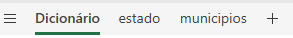

A fim de torná-los mais leves e fáceis de trabalhar, deletei as planilhas "Dicionário" e "municipio" de cada arquivo por não julgar elas como necessárias para o desenvolvimento do projeto. Todavia, mantive as informações da primeira em separado para posterior consulta. Tal processo serve para saber o que cada dado significa dentro do contexto analisado. Isso é o que você verá no próximo ponto.

# 1.1 - DICIONÁRIO DE DADOS

## 1.1.1 - ATRIBUTOS GERAIS
ibge_id - código IBGE da unidade da federação e municípios (a Bahia está representada pelo número 29);

inep_id - código Inep para as escolas (8 dígitos);

ano - ano de coleta do indicador selecionado (4 dígitos);

ciclo_id - etapa da educação básica (anos iniciais, anos finais ou ensino médio);

dependencia_id - dependência administrativa (0 - total, 1 - federal, 2 - estadual, 3 - municipal, 4 - privada, 5 - pública);

localizacao_id - localização (0 - total, 1 - urbana, 2 - rural);

serie_id - série escolar (1 - 1º ano, 2 - 2º ano, 3 - 3º ano, 4 - 4º ano, 5 - 5º ano, 6 - 6º ano, 7 - 7º ano, 8 - 8º ano, 9 - 9º ano, 10 - 1º ano EM, 11 - 2º ano EM, 12 - 3º ano EM);

## 1.1.2 - ATRIBUTOS ESPECÍFICOS
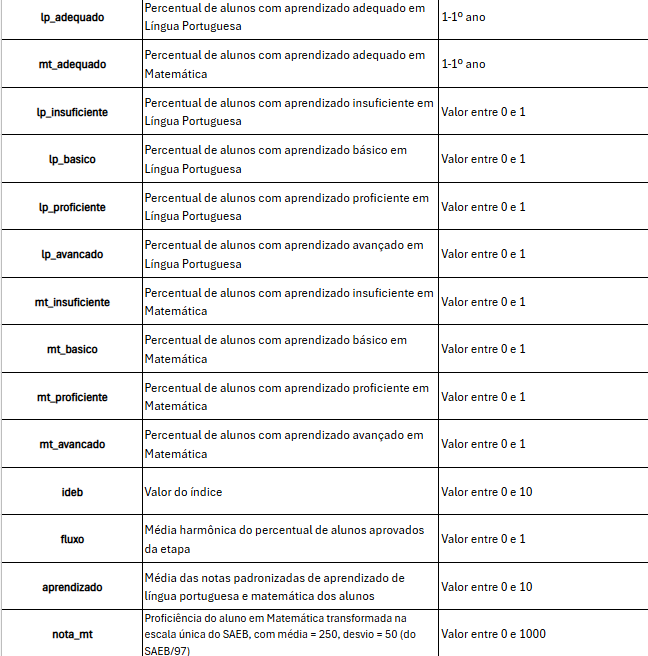
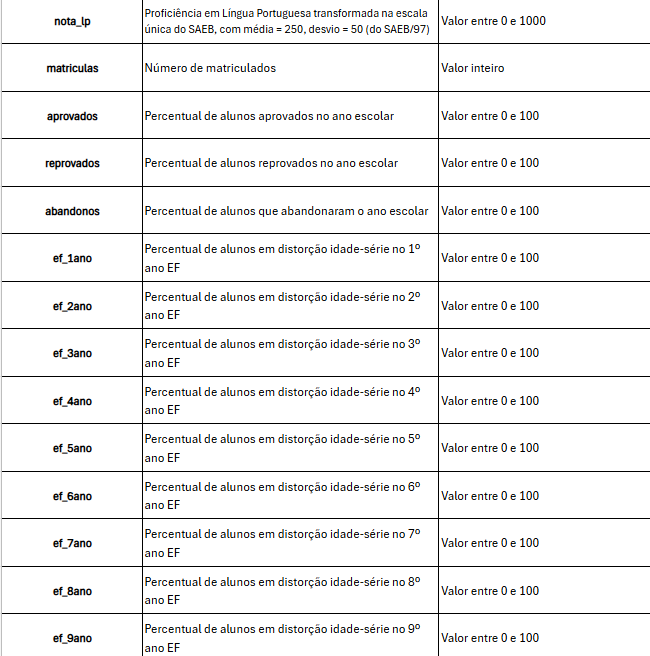
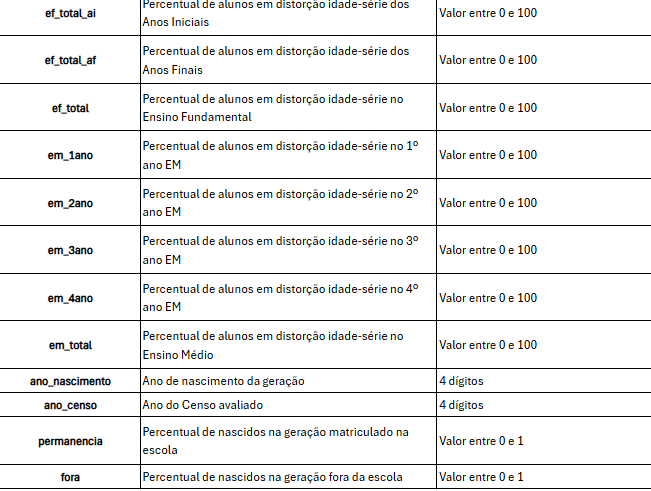


Após conhecermos o que cada coluna representa na teoria, vamos agora para a parte prática. É hora de conhecermos os indicadores mais a fundo.








# 1.2 - PREPARAÇÃO DO AMBIENTE

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Exibir todas as colunas do dataframe
pd.set_option('display.max_columns', 500)

# Alteração no estilo do gráfico
sns.set_style("darkgrid")
sns.set_palette("magma")

# Desativação de alertas
warnings.filterwarnings("ignore")

# Importação dos dataframes necessários
permanencias = pd.read_excel('./dados/permanencias-29-2020-AF.xlsx', index_col=1)
ideb_af = pd.read_excel('./dados/ideb_territorios-29-2023-AF.xlsx')
ideb_ai = pd.read_excel('./dados/ideb_territorios-29-2023-AI.xlsx')
ideb_em = pd.read_excel('./dados/ideb_territorios-29-2023-EM.xlsx')
distorcao_af = pd.read_excel('./dados/distorcao_idade_serie_territorios-29-2023-AF 1.xlsx')
distorcao_ai = pd.read_excel('./dados/distorcao_idade_serie_territorios-29-2023-AI.xlsx')
distorcao_em = pd.read_excel('./dados/distorcao_idade_serie_territorios-29-2023-EM.xlsx')
saeb_af = pd.read_excel('./dados/saeb_aprendizado_territorios-29-2021-AF.xlsx')
saeb_ai = pd.read_excel('./dados/saeb_aprendizado_territorios-29-2021-AI.xlsx')
saeb_em = pd.read_excel('./dados/saeb_aprendizado_territorios-29-2021-EM.xlsx')
rendimento_af = pd.read_excel('./dados/taxa_rendimento_territorios-29-2023-AF.xlsx')
rendimento_ai = pd.read_excel('./dados/taxa_rendimento_territorios-29-2023-AF.xlsx')
rendimento_em = pd.read_excel('./dados/taxa_rendimento_territorios-29-2023-EM.xlsx')

Após uma visualização um pouco mais aprofundada nas planilhas, percebi que os valores presentes nas permanências são os mesmos em todas as tabelas Portanto, iremos trabalhar com apenas uma delas. Para os demais indicadores, podemos concatenar várias tabelas em uma - e isso deve ser feito para cada indicador, vale ressaltar - , de forma que facilite o processo de análise dos dados. Veja a seguir:

# 1.3 - TRATAMENTO INICIAL DOS DADOS

In [3]:
# Concatenação de tabelas
ideb = pd.concat([ideb_af, ideb_ai, ideb_em], ignore_index=True)
distorcao = pd.concat([distorcao_af, distorcao_ai, distorcao_em], ignore_index=True)
saeb = pd.concat([saeb_af, saeb_ai, saeb_em], ignore_index=True)
rendimento = pd.concat([rendimento_af, rendimento_ai, rendimento_em], ignore_index=True)

# Criação de indexes para cada tabela
ideb = ideb.set_index("ano")
distorcao = distorcao.set_index("ano")
saeb = saeb.set_index("ano")
rendimento = rendimento.set_index("ano")

# Substituição de valores categóricos e abreviados para melhor compreensão
ideb = ideb.replace(to_replace={'AI':'Anos Iniciais', 'AF':'Anos Finais', 'EM':'Ensino Médio'})
saeb = saeb.replace(to_replace={'AI':'Anos Iniciais', 'AF':'Anos Finais', 'EM':'Ensino Médio'})

ideb['dependencia_id'] = ideb['dependencia_id'].replace(to_replace={0:'Total', 1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada', 5:'Pública'})
distorcao['dependencia_id'] = distorcao['dependencia_id'].replace(to_replace={0:'Total', 1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada', 5:'Pública'})
saeb['dependencia_id'] = saeb['dependencia_id'].replace(to_replace={0:'Total', 1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada', 5:'Pública'})
rendimento['dependencia_id'] = rendimento['dependencia_id'].replace(to_replace={0:'Total', 1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada', 5:'Pública'})

distorcao['localizacao_id'] = distorcao['localizacao_id'].replace(to_replace={0:'Total', 1:'Urbana', 2:'Rural'})
rendimento['localizacao_id'] = rendimento['localizacao_id'].replace(to_replace={0:'Total', 1:'Urbana', 2:'Rural'})

rendimento['serie_id'] = rendimento['serie_id'].replace(to_replace={(6,7,8,9):'Anos Finais', (10,11,12):'Ensino Médio'})

# Criação de uma lista com todas as tabelas
lista_df = [permanencias, ideb, distorcao, saeb, rendimento]

De quinze tabelas a serem trabalhadas, reduzimos para cinco apenas com algumas ações. Certamente, isso nos poupará bastante tempo.

# 1.4 - OBTENÇÃO DE INFORMAÇÕES GERAIS

In [4]:
for df in lista_df:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2003 to 2005
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ibge_id      3 non-null      int64  
 1   ano_censo    3 non-null      int64  
 2   permanencia  3 non-null      float64
 3   fora         3 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 120.0 bytes
None

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2023 to 2023
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ibge_id         11 non-null     int64  
 1   dependencia_id  11 non-null     object 
 2   ciclo_id        11 non-null     object 
 3   ideb            11 non-null     float64
 4   fluxo           11 non-null     float64
 5   aprendizado     11 non-null     float64
 6   nota_mt         11 non-null     float64
 7   nota_lp         11 non-null     float64
dtypes: float64(5), int64(1), obje

Após breve observação, percebemos que:

- a esmagadora maioria das colunas estão nos tipos int64 ou float64 (exceto as colunas ciclo_id, dependencia_id, localizacao_id e serie_id);

- a contagem de valores não-nulos não é homogênea em algumas colunas. Isso significa que existe algum tipo de inconsistência em alguns dados, o que será checado no próximo passo;

- são datasets relativamente pequenos, mas não necessariamente fáceis de se trabalhar.

# 1.5 - CHECAGEM DE VALORES NULOS E DUPLICADOS

In [5]:
# Criação de um loop que checa os valores nulos em todos os dataframes
for df in lista_df:
    print(df.isnull().sum().sum())
    print()

0

0

84

0

222



In [6]:
# Criação de um loop que checa os valores nulos em todos os dataframes
for df in lista_df:
    print(df.duplicated().sum())
    print()

0

0

36

0

79



### 1.5.1 - PRIMEIROS INSIGHTS
- As tabelas "permanencia", "ideb" e "saeb" não apresentam qualquer valor nulo ou duplicado, ou seja, não precisamos realizar quaisquer alterações;

- Por outro lado, as tabelas "distorcao" e "rendimento" apresentam muitos valores nulos e duplicados, o que significa que precisaremos tomar alguma atitude.

### 1.5.2 - TRATAMENTO DE VALORES NULOS E DUPLICADOS
- Perceba que as colunas com valores nulos na tabela "distorcao" podem ser removidas normalmente, haja vista que o agregado de todas essas colunas já estão inseridos nas colunas "ef_total" e "em_total". A primeira, por sua vez, possui apenas três valores nulos, que também serão removidos;
- A coluna "matriculas" não possui quaisquer valores na tabela "rendimento", o que indica que ela não foi preenchida da maneira devida. Iremos removê-la, assim como os oito registros nulos referentes às colunas "aprovados", "reprovados" e "abandonos";
- Infelizmente, os valores duplicados constituem uma parte considerável dos respectivos datasets, o que significa que não podemos excluí-los sem perder dados de maneira significativa.

In [7]:
# Remoção de valores nulos dos datasets
distorcao = distorcao.drop(["ef_1ano", "ef_2ano", "ef_3ano", "ef_4ano", "ef_5ano", "ef_6ano", "ef_7ano", "ef_8ano", "ef_9ano", "ef_total_ai", "ef_total_af", "em_1ano", "em_2ano", "em_3ano", "em_4ano"], axis=1, errors='ignore')
distorcao = distorcao.dropna()

rendimento = rendimento.drop("matriculas", axis=1, errors='ignore')
rendimento = rendimento.dropna()

# 1.6 - ESTATÍSTICAS GERAIS

In [8]:
# Descreve as estatísticas gerais da tabela
permanencias.describe()

,ibge_id,ano_censo,permanencia,fora
count,3.0,3.0,3.000000,3.000000
mean,29.0,2020.0,0.943333,0.056667
std,0.0,0.0,0.040415,0.040415
min,29.0,2020.0,0.900000,0.020000
25%,29.0,2020.0,0.925000,0.035000
50%,29.0,2020.0,0.950000,0.050000
75%,29.0,2020.0,0.965000,0.075000
max,29.0,2020.0,0.980000,0.100000


In [9]:
# Descreve as estatísticas gerais da tabela
ideb.describe()

,ibge_id,ideb,fluxo,aprendizado,nota_mt,nota_lp
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,29.0,4.854545,0.926364,5.230000,244.401818,241.905455
std,0.0,1.000364,0.042255,0.912118,35.196266,36.670794
min,29.0,3.700000,0.870000,4.010000,199.720000,191.350000
25%,29.0,3.950000,0.895000,4.405000,222.255000,219.490000
50%,29.0,4.900000,0.930000,5.260000,240.260000,236.620000
75%,29.0,5.500000,0.955000,5.920000,255.550000,257.730000
max,29.0,6.700000,0.990000,6.750000,321.140000,315.660000


In [10]:
# Descreve as estatísticas gerais da tabela
distorcao.describe()

,ibge_id,ef_total,em_total
count,51.0,51.000000,51.000000
mean,29.0,22.094118,32.770588
std,0.0,7.658131,9.761686
min,29.0,9.500000,7.300000
25%,29.0,17.600000,32.800000
50%,29.0,21.400000,35.700000
75%,29.0,23.500000,37.200000
max,29.0,37.100000,44.200000


In [11]:
# Descreve as estatísticas gerais da tabela
saeb.describe()

,ibge_id,lp_adequado,mt_adequado,lp_insuficiente,lp_basico,lp_proficiente,lp_avancado,mt_insuficiente,mt_basico,mt_proficiente,mt_avancado
count,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000
mean,29.0,0.387972,0.214056,0.231289,0.325172,0.281317,0.106656,0.35835,0.372033,0.152572,0.061483
std,0.0,0.244840,0.218582,0.175795,0.150236,0.163882,0.132794,0.24880,0.148362,0.128378,0.106270
min,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,29.0,0.223975,0.040000,0.080275,0.238450,0.201300,0.012925,0.15585,0.275950,0.036975,0.003025
50%,29.0,0.330250,0.160600,0.216100,0.335800,0.249900,0.047750,0.36270,0.409250,0.141700,0.018900
75%,29.0,0.554300,0.297925,0.270975,0.358575,0.309375,0.147250,0.41105,0.516150,0.236800,0.055725
max,29.0,0.840600,0.712900,0.623400,0.548000,0.703700,0.495700,0.83190,0.539000,0.374700,0.405500


In [12]:
# Descreve as estatísticas gerais da tabela
rendimento.describe()

,ibge_id,aprovados,reprovados,abandonos
count,190.0,190.000000,190.000000,190.000000
mean,29.0,90.989474,6.114211,2.896316
std,0.0,5.795163,4.390895,2.678394
min,29.0,71.200000,0.000000,0.000000
25%,29.0,86.300000,2.100000,0.925000
50%,29.0,91.200000,5.100000,2.900000
75%,29.0,96.300000,9.875000,3.700000
max,29.0,100.000000,14.700000,18.100000


### 1.6.1 - INSIGHTS

- Em média, 94% dos alunos nascidos na geração estão matriculados na escola;
- A média equivalente ao Ideb é de 4.85;
- Aproximadamente 93% dos alunos são aprovados na etapa, enquanto essa média diminui para 91% ao fim do ano;
- A nota média de proficiência em Matemática é de 244.40; já em Língua Portuguesa, 241.90. A média de aprendizado envolvendo as duas matérias é de 5.21;
- A presença da distorção idade-série em termos percentuais é consideravelmente maior no Ensino Médio em relação ao Ensino Fundamental (32% x 22%);
- O percentual de alunos que possuem conhecimentos considerados básicos ou insuficientes de Matemática ultrapassa 70%. Por outro lado, a porcentagem é de 55% para a matéria Língua Portuguesa;
- Isso pode significar que os alunos baianos possuem maior dificuldade em aprender Matemática quando comparada à disciplina Língua Portuguesa;
- Há uma pequena parcela de reprovados e abandonos ao fim do ano (aproximadamente 6% e 3%, respectivamente).

# 1.7 - CONCLUSÕES DA ETAPA

- Apesar de termos, teoricamente, muitas planilhas para trabalhar, conseguimos facilitar o processo a partir da concatenação de tabelas similares. Além disso, medidas como criação de indexes e substituição de dados foram tomadas para simplificar o andamento das tarefas;
- O volume de dados não é muito grande; apesar disso, tivemos que realizar um tratamento nos mesmos até onde foi possível;
- Com o comando describe(), geramos estatísticas gerais para cada tabela a fim de entendermos mais a respeito dos dados com os quais estamos trabalhando.

# 2.0 - ANÁLISE EXPLORATÓRIA DE DADOS
Após realizarmos uma breve observação dos dados e obtermos alguns insights valiosos, iremos nos aprofundar mais um pouco. Nesta segunda etapa, será feita uma análise exploratória de dados (EDA) utilizando, as bibliotecas Matplotlib e Seaborn, que serão responsáveis pela visualização gráfica dos dados. É importante frisar que essa é a parte em que se deve ter mais cuidado, haja vista que ela nos permite formular hipóteses e solucionar eventuais problemas com maior facilidade.

### 2.0.1 - PERMANÊNCIAS

(0.0, 1.0)

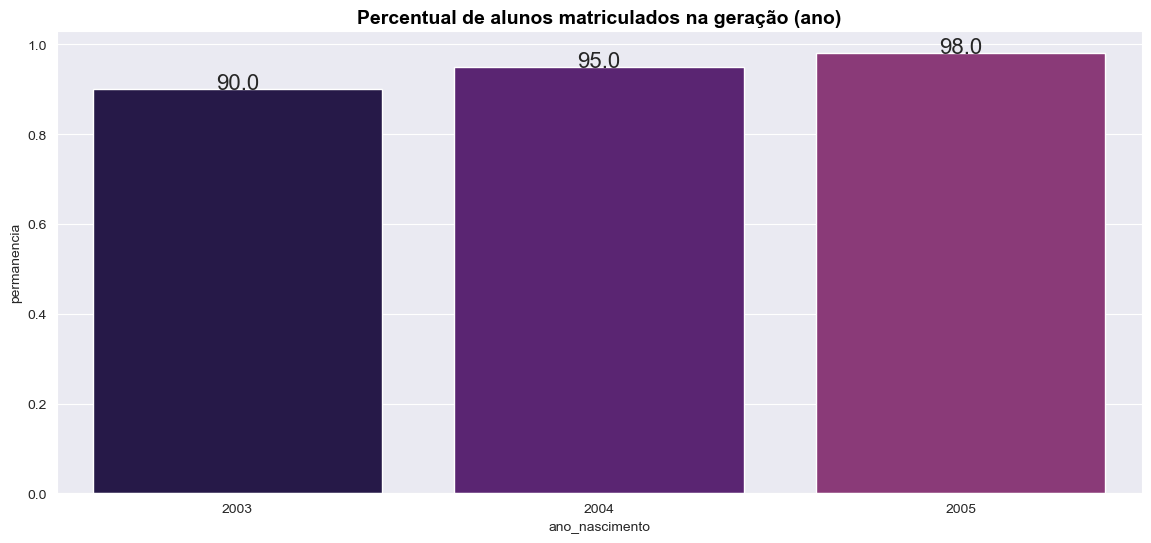

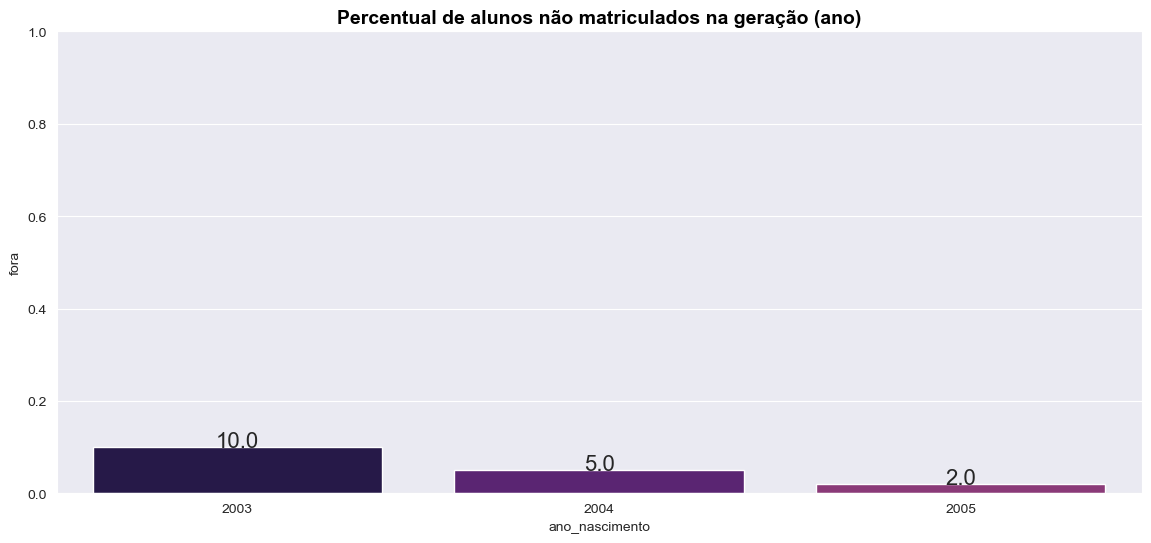

In [13]:
# Criação de gráficos para a tabela "permanencias"
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos matriculados na geração (ano)", fontsize=14, fontweight='bold', color='black')
plot1 = sns.barplot(data = permanencias, x = permanencias.index, y=permanencias["permanencia"])
for i in plot1.patches:
    plot1.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)
    
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos não matriculados na geração (ano)", fontsize=14, fontweight='bold', color='black')
plot2 = sns.barplot(data = permanencias, x = permanencias.index, y=permanencias["fora"])
for i in plot2.patches:
    plot2.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)
plt.ylim(0,1)

#### 2.0.1.1 - INSIGHTS
- O maior percentual de matrículas é referente aos alunos nascidos no ano de 2005; já o menor, é referente aos nascidos no ano de 2003;
- Isso indica que este percentual vem evoluindo de forma constante, ainda que de forma lenta.

### 2.0.2 - IDEB

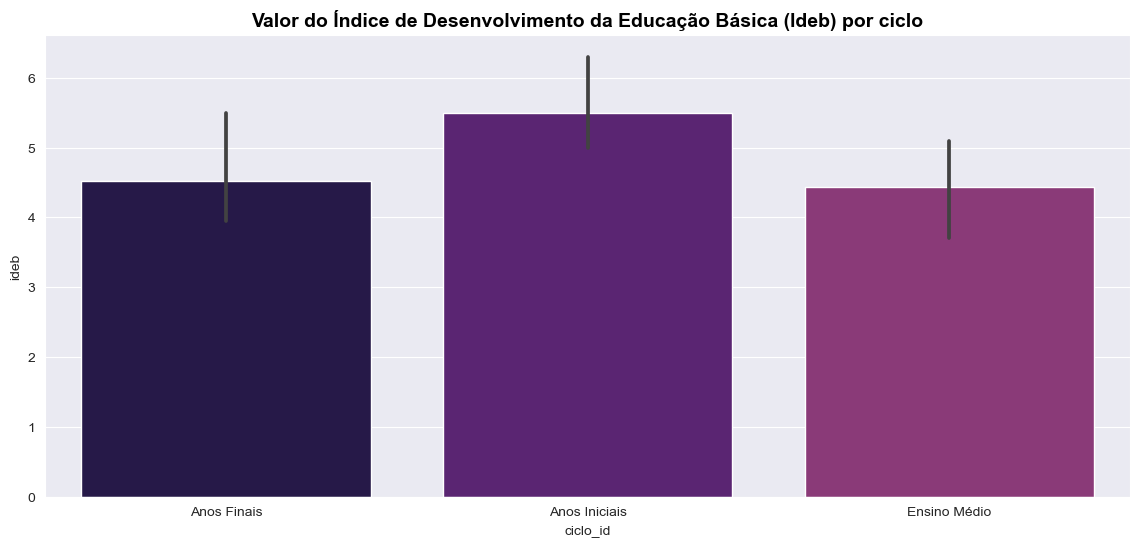

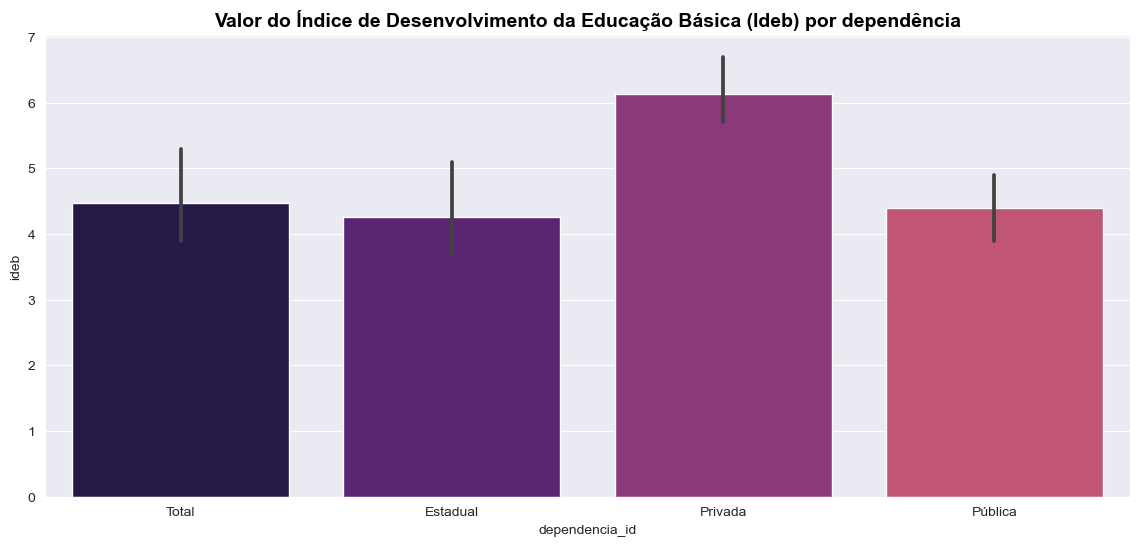

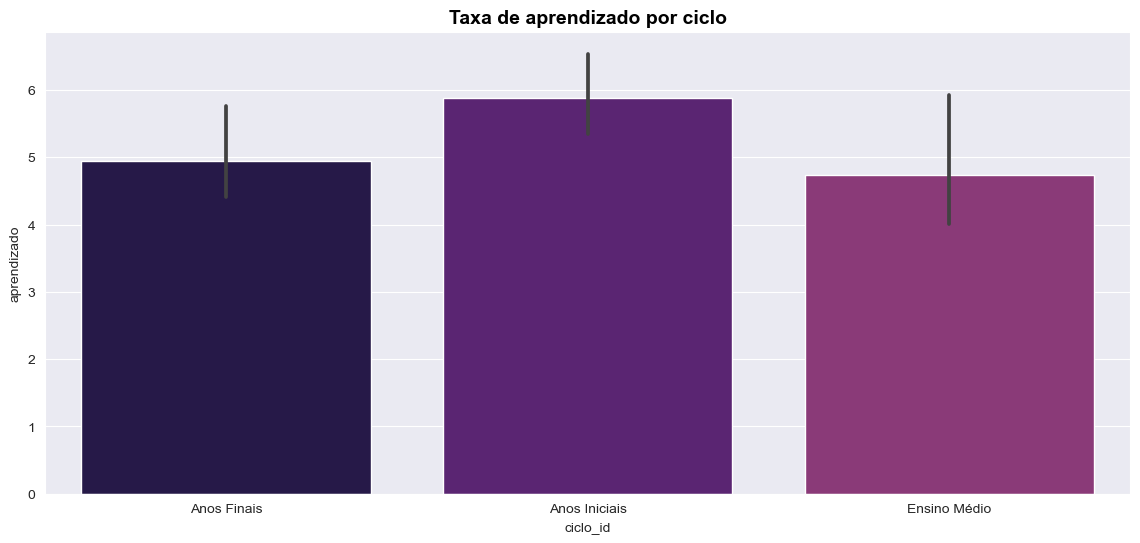

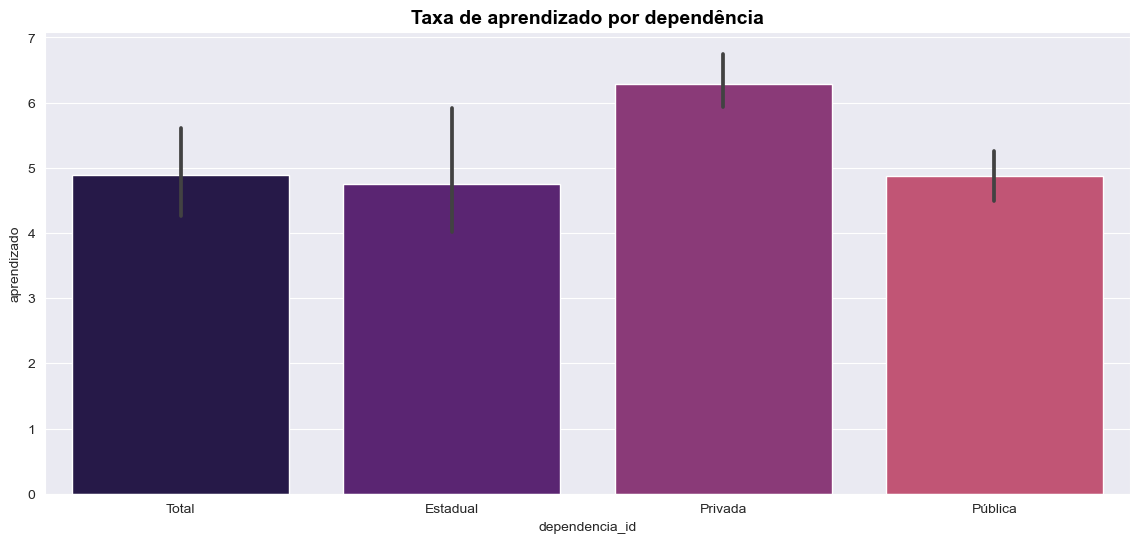

In [14]:
# Criação de gráficos para a tabela "ideb"
plt.figure(figsize=(14,6))
plt.title("Valor do Índice de Desenvolvimento da Educação Básica (Ideb) por ciclo", fontsize=14, fontweight='bold', color='black')
plot3 = sns.barplot(data = ideb, x = ideb['ciclo_id'], y=ideb['ideb'])
    
plt.figure(figsize=(14,6))
plt.title("Valor do Índice de Desenvolvimento da Educação Básica (Ideb) por dependência", fontsize=14, fontweight='bold', color='black')
plot4 = sns.barplot(data = ideb, x = ideb['dependencia_id'], y=ideb['ideb'])

plt.figure(figsize=(14,6))
plt.title("Taxa de aprendizado por ciclo", fontsize=14, fontweight='bold', color='black')
plot5 = sns.barplot(data = ideb, x = ideb['ciclo_id'], y=ideb['aprendizado'])

plt.figure(figsize=(14,6))
plt.title("Taxa de aprendizado por dependência", fontsize=14, fontweight='bold', color='black')
plot6 = sns.barplot(data = ideb, x = ideb['dependencia_id'], y=ideb['aprendizado'])

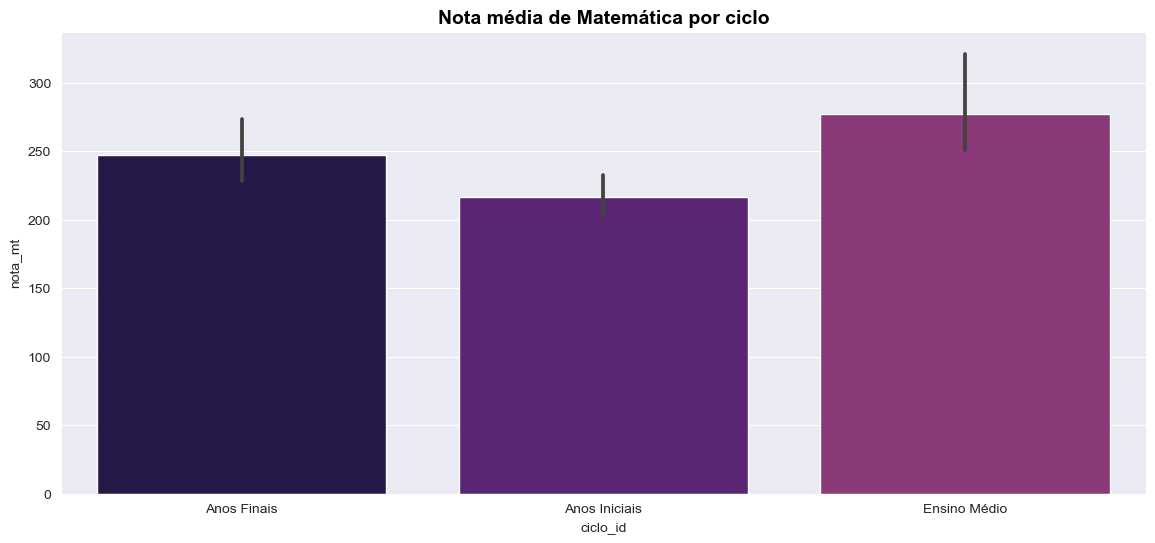

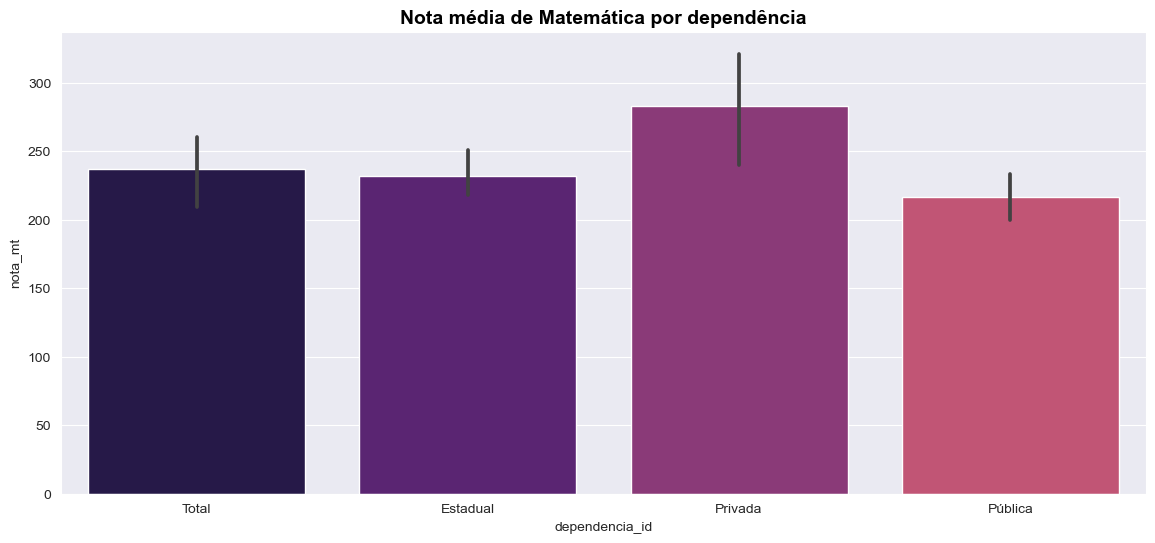

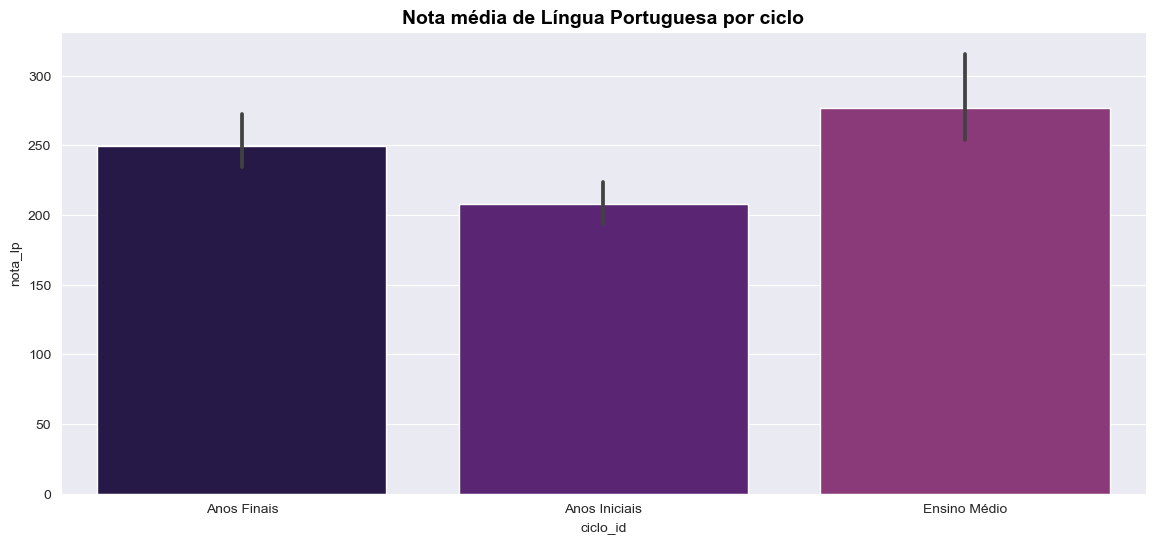

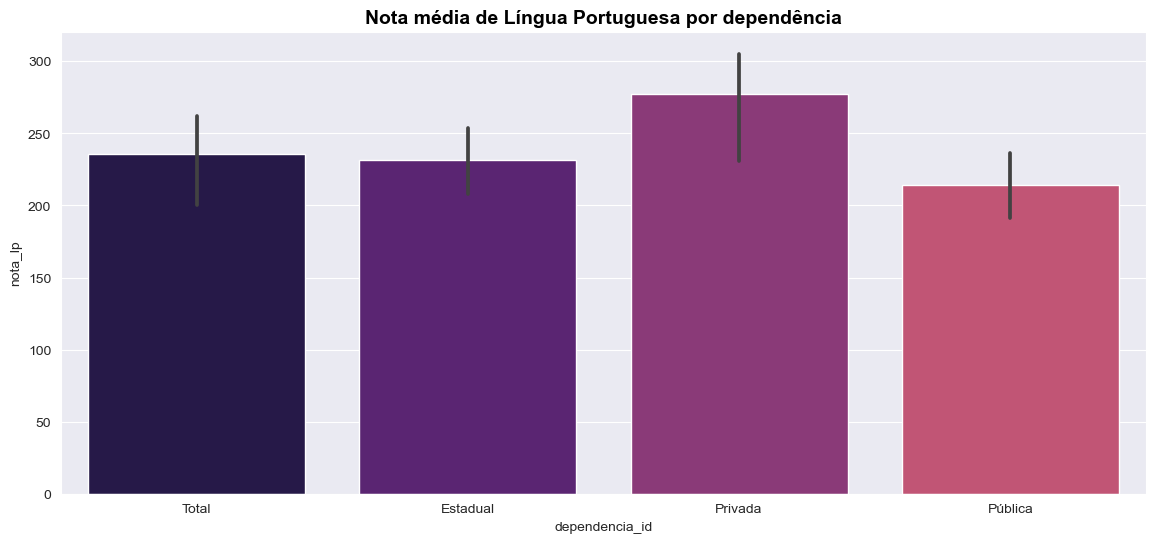

In [15]:
# Criação de gráficos para a tabela "ideb"
plt.figure(figsize=(14,6))
plt.title("Nota média de Matemática por ciclo", fontsize=14, fontweight='bold', color='black')
plot7 = sns.barplot(data = ideb, x = ideb['ciclo_id'], y=ideb['nota_mt'])
    
plt.figure(figsize=(14,6))
plt.title("Nota média de Matemática por dependência", fontsize=14, fontweight='bold', color='black')
plot8 = sns.barplot(data = ideb, x = ideb['dependencia_id'], y=ideb['nota_mt'])

plt.figure(figsize=(14,6))
plt.title("Nota média de Língua Portuguesa por ciclo", fontsize=14, fontweight='bold', color='black')
plot9 = sns.barplot(data = ideb, x = ideb['ciclo_id'], y=ideb['nota_lp'])

plt.figure(figsize=(14,6))
plt.title("Nota média de Língua Portuguesa por dependência", fontsize=14, fontweight='bold', color='black')
plot10 = sns.barplot(data = ideb, x = ideb['dependencia_id'], y=ideb['nota_lp'])

#### 2.0.2.1 - INSIGHTS
- Os valores do Ideb e da taxa de aprendizado por ciclo tendem a ser maiores nos anos iniciais do Ensino Fundamental, diminuindo gradativamente até chegar ao Ensino Médio;
- Ao contrário dos indicadores acima, as notas médias de Matemática e Língua Portuguesa tendem a ser menores nos anos iniciais do Ensino Fundamental, aumentando de forma gradativa até atingirem o seu ápice no Ensino Médio;
- No que tange ao Ideb, à taxa de aprendizado e às notas médias de Matemática, as escolas privadas são as que apresentam as maiores notas médias em relação às demais;
- Analisando os mesmos critérios acima, nota-se uma inferioridade notável das escolas públicas em relação às demais.

### 2.0.3 - DISTORÇÃO

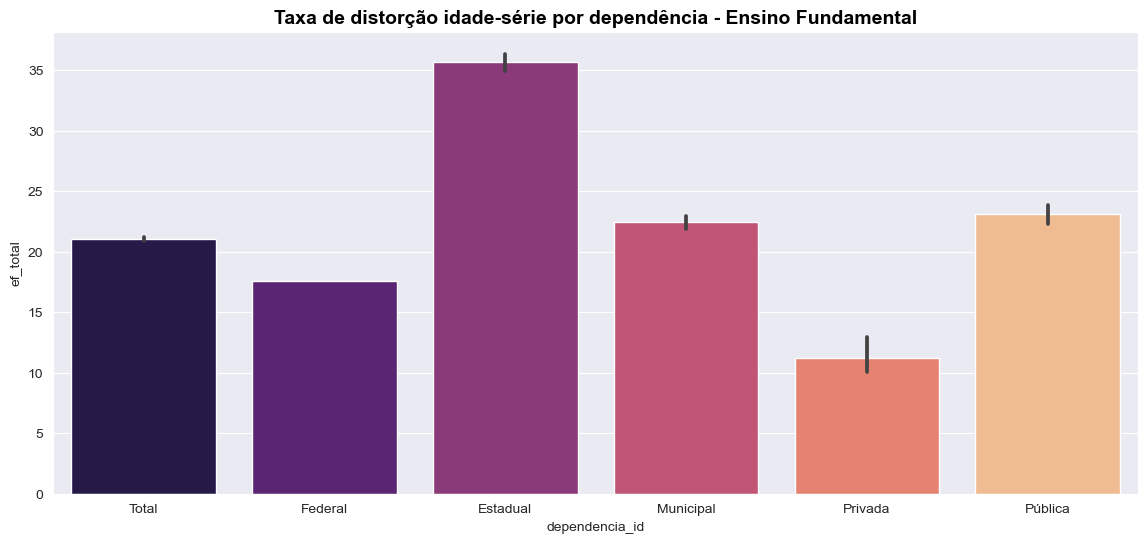

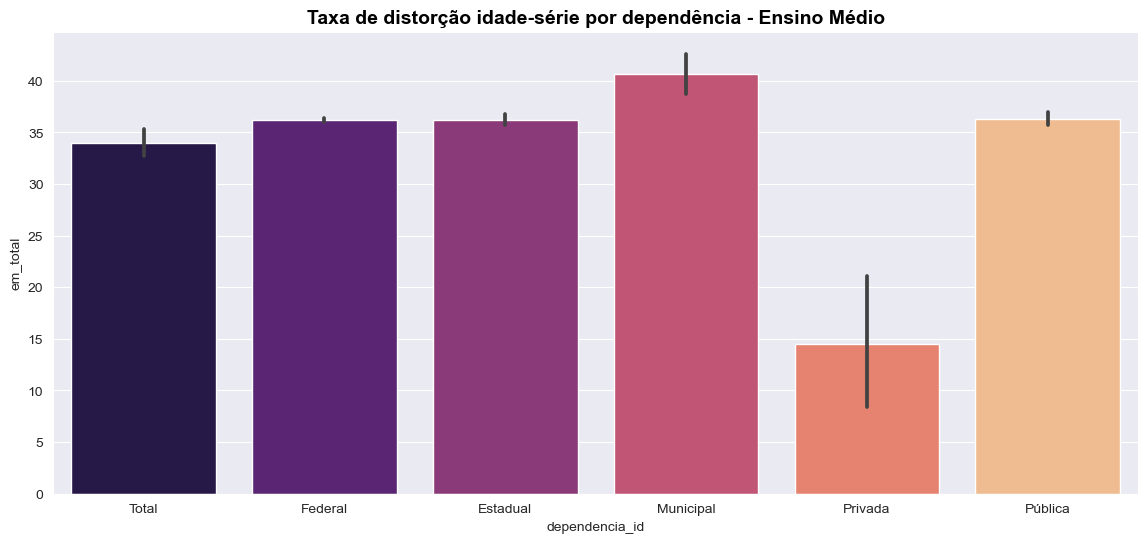

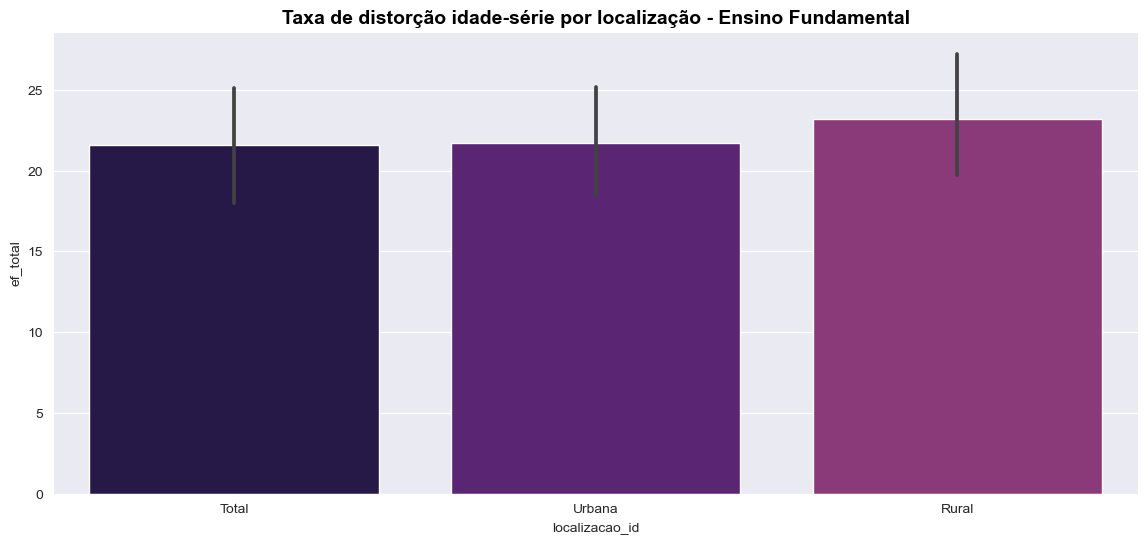

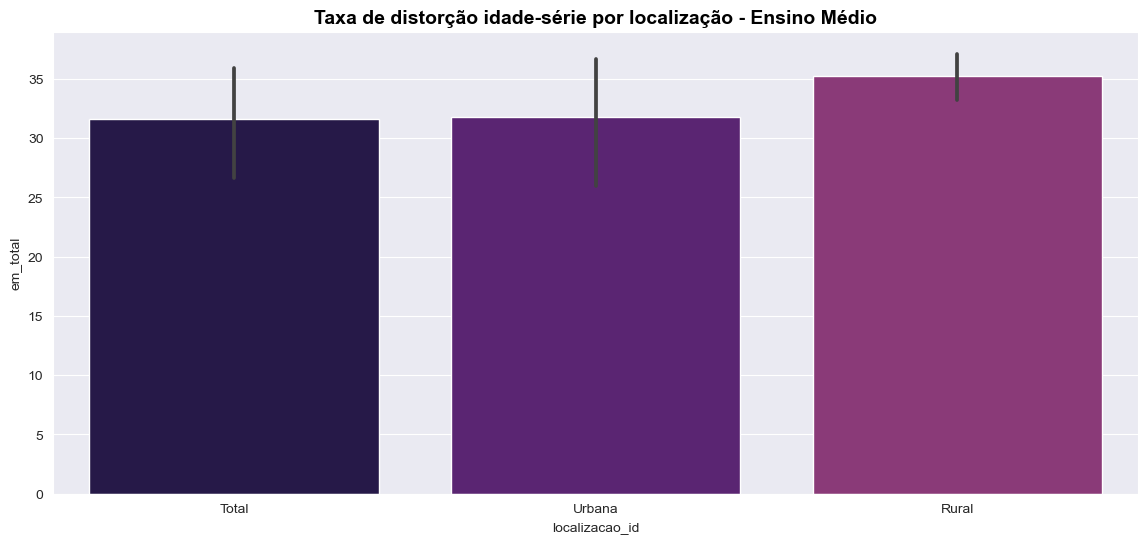

In [16]:
# Criação de gráficos para a tabela "distorcao"
plt.figure(figsize=(14,6))
plt.title("Taxa de distorção idade-série por dependência - Ensino Fundamental", fontsize=14, fontweight='bold', color='black')
plot11 = sns.barplot(data = distorcao, x = distorcao["dependencia_id"], y=distorcao["ef_total"])
    
plt.figure(figsize=(14,6))
plt.title("Taxa de distorção idade-série por dependência - Ensino Médio", fontsize=14, fontweight='bold', color='black')
plot12 = sns.barplot(data = distorcao, x = distorcao["dependencia_id"], y=distorcao["em_total"])

plt.figure(figsize=(14,6))
plt.title("Taxa de distorção idade-série por localização - Ensino Fundamental", fontsize=14, fontweight='bold', color='black')
plot13 = sns.barplot(data = distorcao, x = distorcao["localizacao_id"], y=distorcao["ef_total"])

plt.figure(figsize=(14,6))
plt.title("Taxa de distorção idade-série por localização - Ensino Médio", fontsize=14, fontweight='bold', color='black')
plot14 = sns.barplot(data = distorcao, x = distorcao["localizacao_id"], y=distorcao["em_total"])

#### 2.0.3.1 - INSIGHTS
- No Ensino Fundamental, as dependências escolares com maior taxa de distorção idade-série são as municipais, com larga vantagem para as estaduais e públicas, que aparecem empatadas;
- Já no Ensino Médio, as escolas municipais apresentam o maior percentual de alunos que estão em séries escolares inadequadas para a sua idade;
- Nos dois primeiros gráficos, as escolas privadas apresentam a menor taxa de distorção;
- Quanto â localização, escolas localizadas em zonas rurais possuem percentual maior de alunos "atrasados" quando comparadas a escolas localizadas em zonas urbanas.

### 2.0.4 - SAEB

#### 2.0.4.1 - POR DEPENDÊNCIA

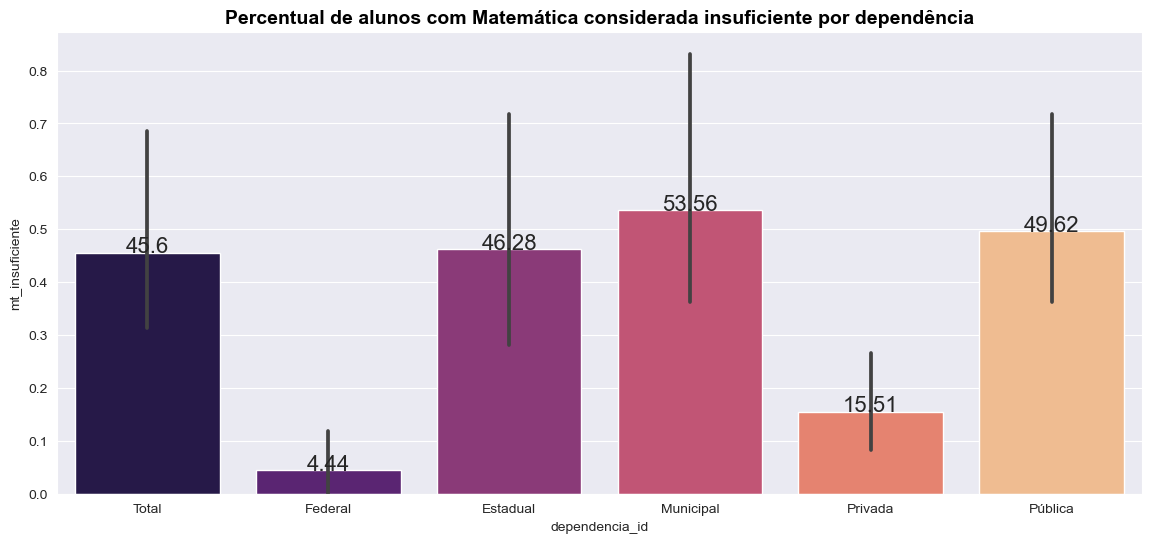

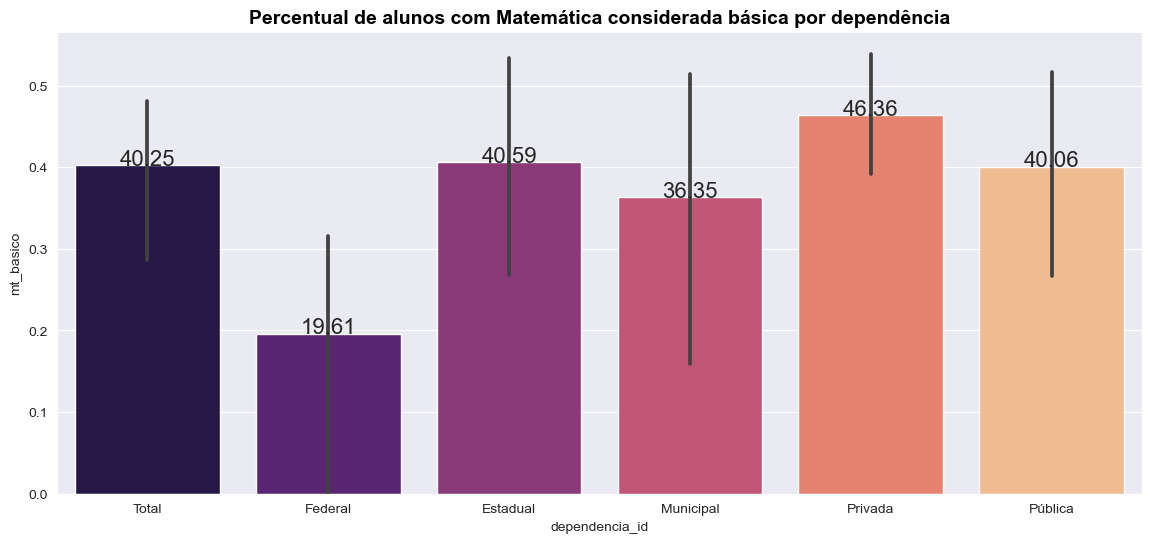

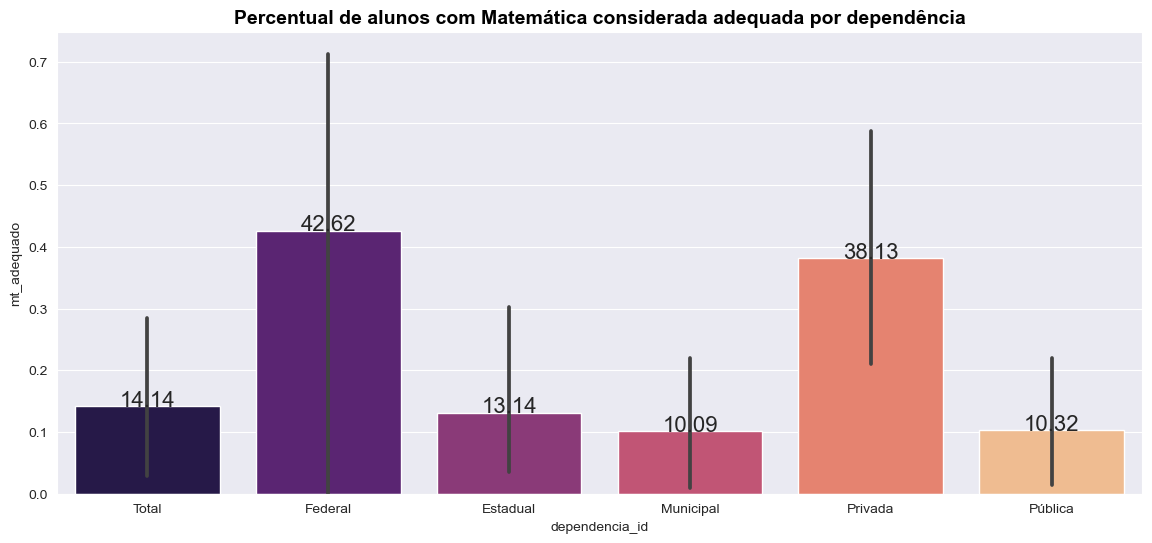

In [17]:
# Criação de gráficos para a tabela "saeb"
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada insuficiente por dependência", fontsize=14, fontweight='bold', color='black')
plot15 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["mt_insuficiente"])
for i in plot15.patches:
    plot15.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada básica por dependência", fontsize=14, fontweight='bold', color='black')
plot16 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["mt_basico"])
for i in plot16.patches:
    plot16.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada adequada por dependência", fontsize=14, fontweight='bold', color='black')
plot17 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["mt_adequado"])
for i in plot17.patches:
    plot17.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

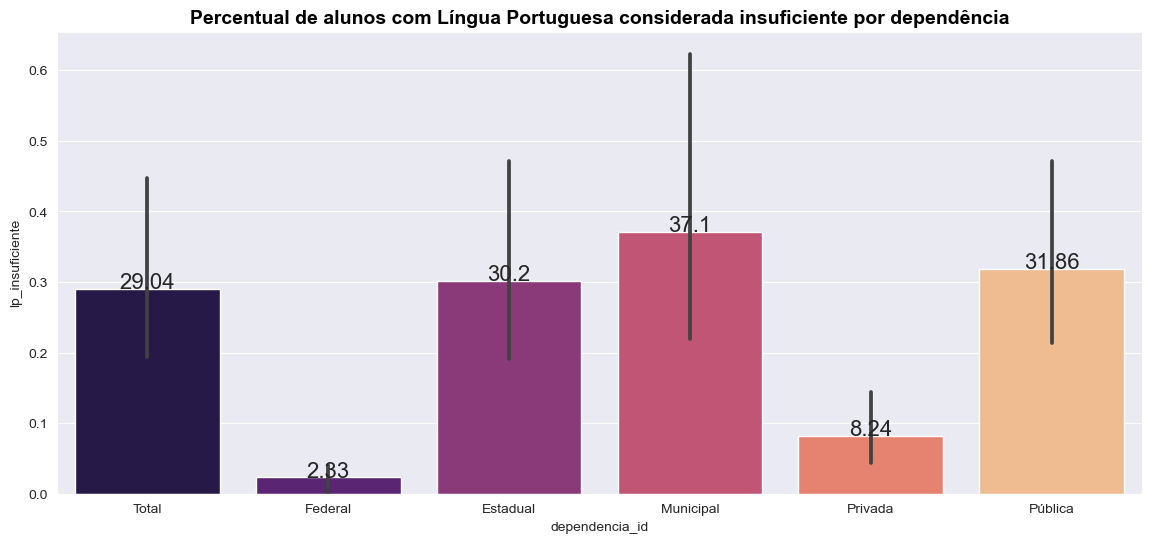

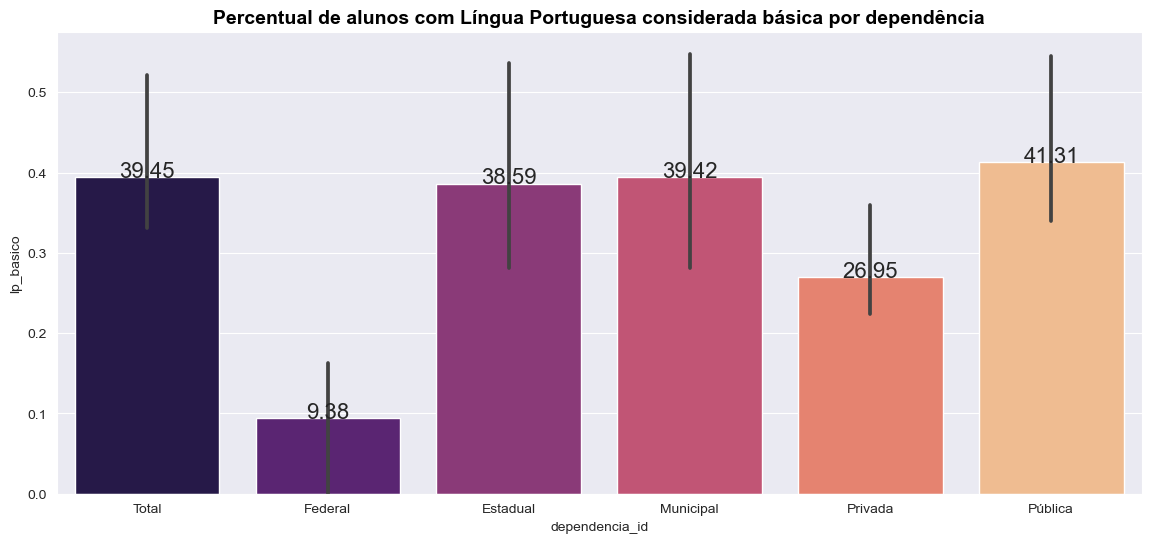

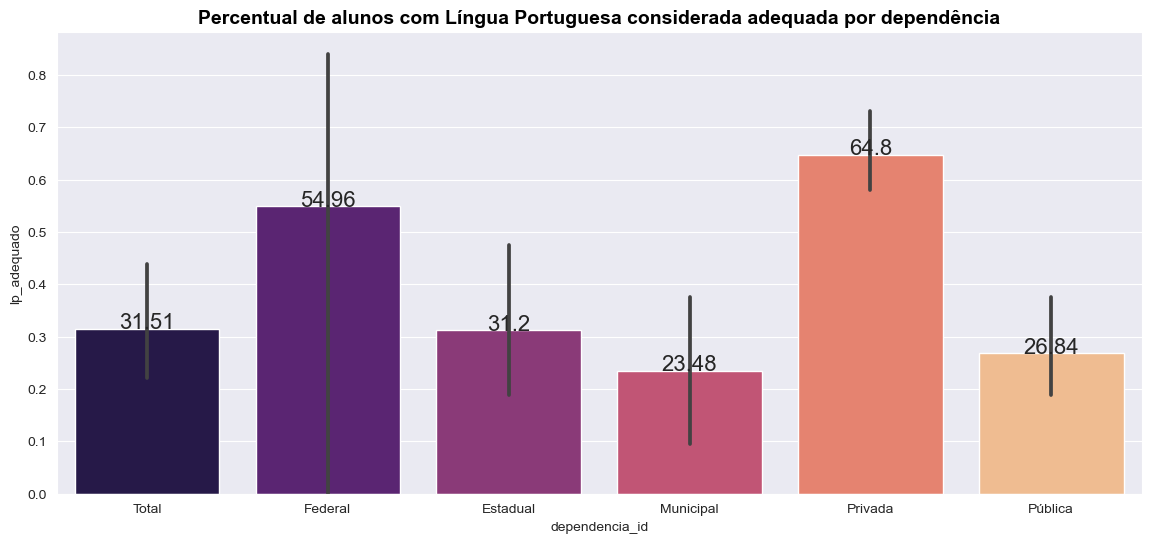

In [18]:
# Criação de gráficos para a tabela "saeb"
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada insuficiente por dependência", fontsize=14, fontweight='bold', color='black')
plot18 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["lp_insuficiente"])
for i in plot18.patches:
    plot18.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)
    
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada básica por dependência", fontsize=14, fontweight='bold', color='black')
plot19 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["lp_basico"])
for i in plot19.patches:
    plot19.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada adequada por dependência", fontsize=14, fontweight='bold', color='black')
plot20 = sns.barplot(data = saeb, x = saeb["dependencia_id"], y=saeb["lp_adequado"])
for i in plot20.patches:
    plot20.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

#### 2.0.4.2 - INSIGHTS
- As dependências escolares municipais lideram no percentual de alunos com Matemática considerada insuficiente, seguidas pelas escolas das redes estadual e pública. Instituições de ensino privadas e federais são as que possuem os menores percentuais, respectivamente. Este cenário se repete em relação ao percentual de alunos com Língua Portuguesa considerada insuficiente;
- As escolas federais também apresentam o menor percentual de alunos com Matemática considerada básica. Nesse contexto, as escolas da rede privada lideram, seguidas em ordem pelas escolas públicas, estaduais e municipais;
- Entretanto, as instituições de ensino federais possuem o maior percentual de alunos com Matemática considerada adequada, um número pouco maior que o das escolas privadas, que vêm logo em seguida. Vale ressaltar que as escolas das redes pública, estadual e municipal possuem índices bastante preocupantes neste aspecto. Este cenário se repete em relação ao percentual de alunos com Língua Portuguesa considerada insuficiente;
- Os alunos oriundos das escolas públicas são os que apresentam maior percentual de conhecimento básico em Língua Portuguesa, com pouca distância para os alunos das redes municipal e estadual.

#### 2.0.4.3 - POR CICLO

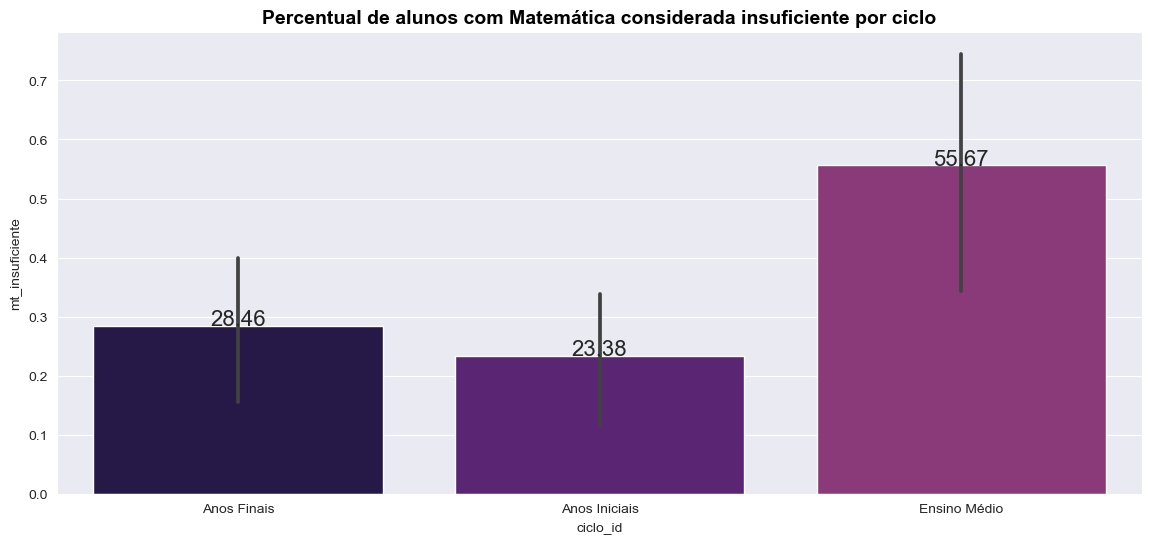

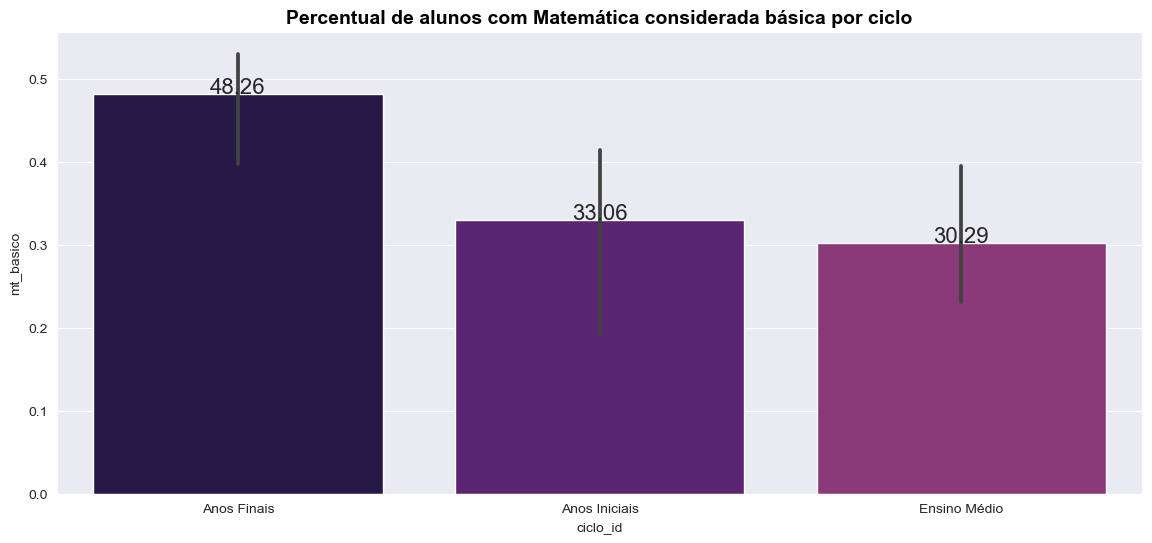

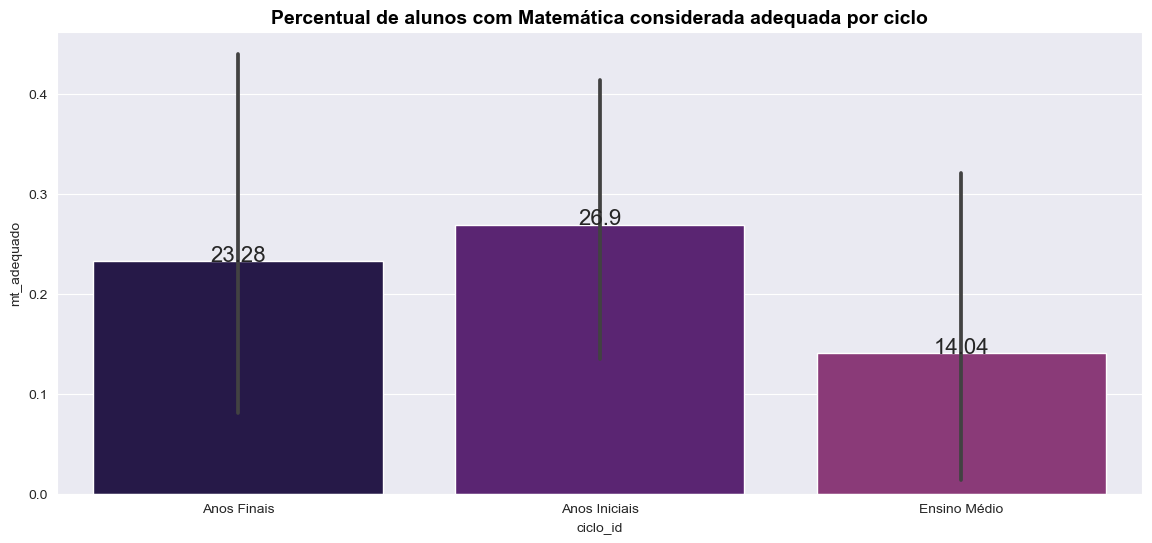

In [19]:
# Criação de gráficos para a tabela "saeb"
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada insuficiente por ciclo", fontsize=14, fontweight='bold', color='black')
plot21 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["mt_insuficiente"])
for i in plot21.patches:
    plot21.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada básica por ciclo", fontsize=14, fontweight='bold', color='black')
plot22 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["mt_basico"])
for i in plot22.patches:
    plot22.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)
    
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Matemática considerada adequada por ciclo", fontsize=14, fontweight='bold', color='black')
plot23 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["mt_adequado"])
for i in plot23.patches:
    plot23.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

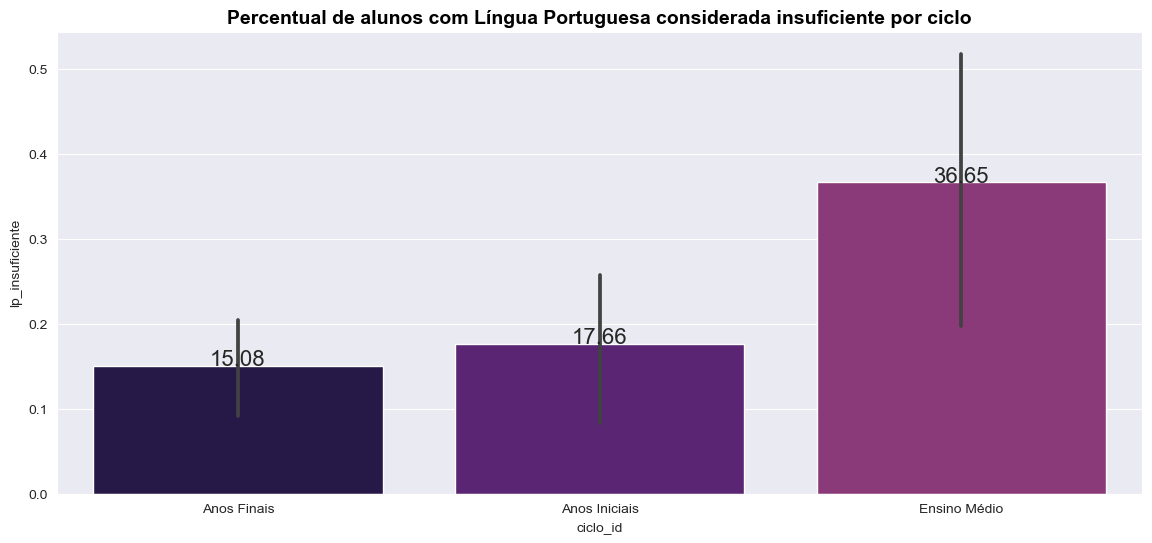

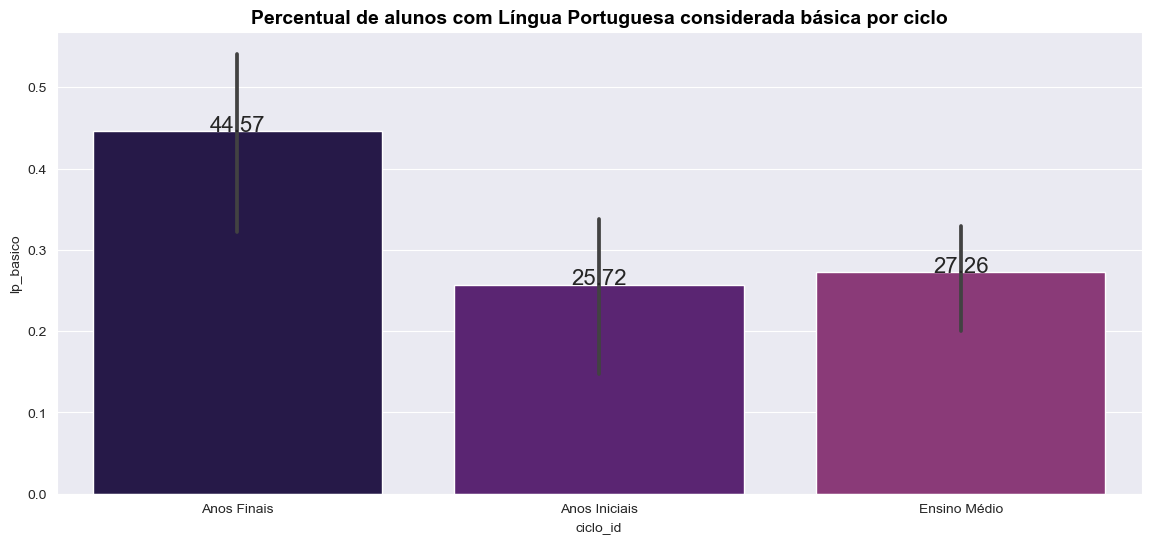

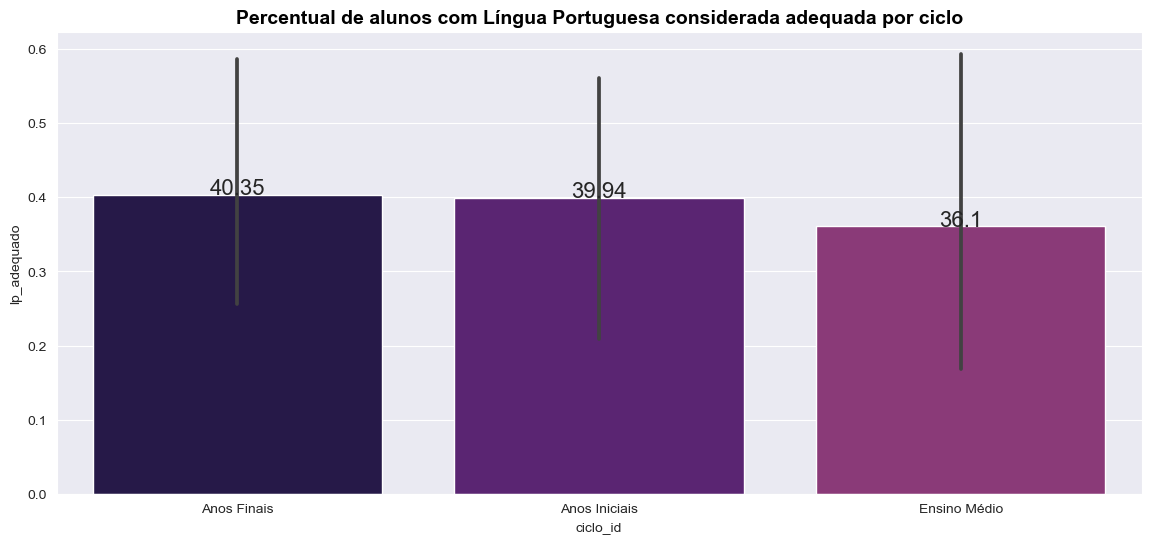

In [20]:
# Criação de gráficos para a tabela "saeb"
plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada insuficiente por ciclo", fontsize=14, fontweight='bold', color='black')
plot24 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["lp_insuficiente"])
for i in plot24.patches:
    plot24.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada básica por ciclo", fontsize=14, fontweight='bold', color='black')
plot25 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["lp_basico"])
for i in plot25.patches:
    plot25.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

plt.figure(figsize=(14,6))
plt.title("Percentual de alunos com Língua Portuguesa considerada adequada por ciclo", fontsize=14, fontweight='bold', color='black')
plot26 = sns.barplot(data = saeb, x = saeb["ciclo_id"], y=saeb["lp_adequado"])
for i in plot26.patches:
    plot26.annotate(round(i.get_height() * 100, 2), (i.get_x() + i.get_width() / 2, i.get_height()),ha='center', va='baseline', fontsize=16)

#### 2.0.4.4 - INSIGHTS
- Na matéria Língua Portuguesa, nota-se um certo equilíbrio entre os três ciclos no que tange ao domínio adequado dela. Todavia, o mesmo não ocorre na disciplina Matemática, onde alunos do Ensino Médio claramente possuem maiores problemas em relação aos dos demais ciclos;
- Em ambas as matérias, percebe-se que os alunos do Ensino Médio possuem um percentual de domínio considerado insuficiente maior que os alunos do Ensino Fundamental;
- Enquanto alunos que estão nos anos iniciais do Ensino Fundamental tendem a se sair melhor em Matemática, tendo o menor percentual de domínio considerado insuficiente e o maior considerado adequado, alunos que estão nos anos finais possuem maior proficiência em Língua Portuguesa com base nos critérios abordados anteriormente.

### 2.0.5 - RENDIMENTO

#### 2.0.5.1 - POR CICLO

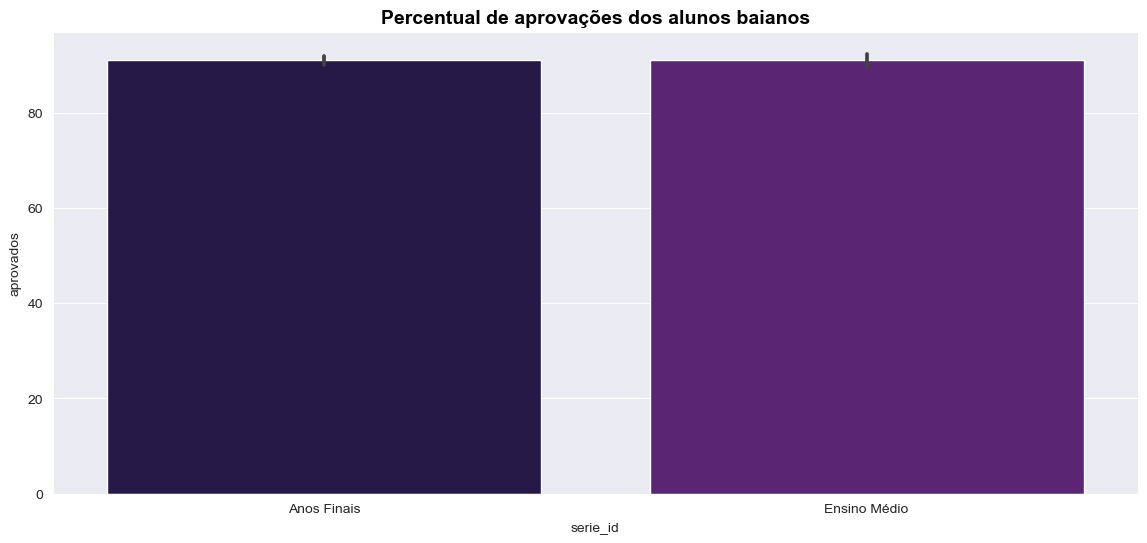

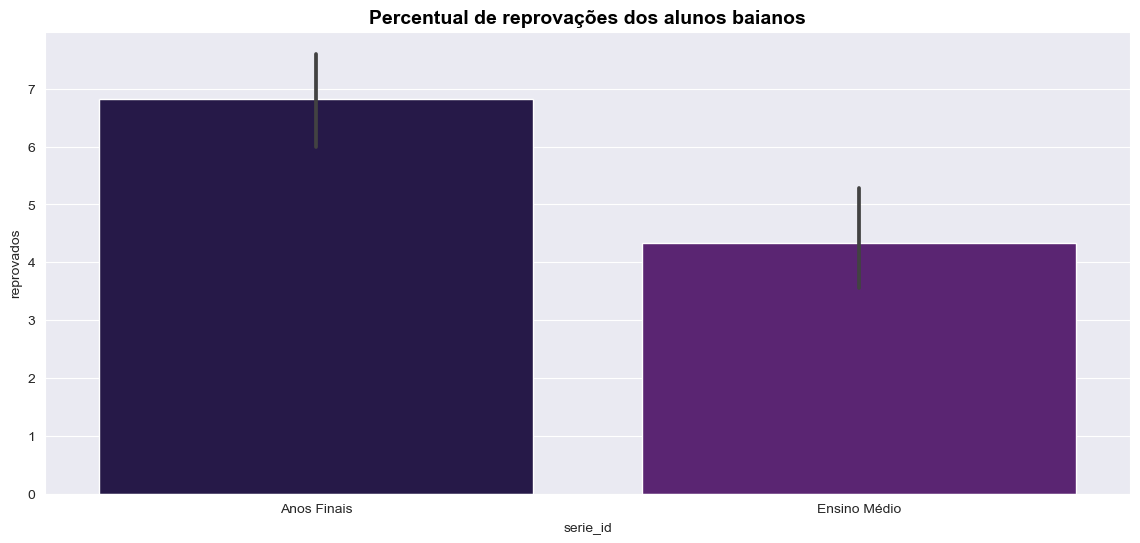

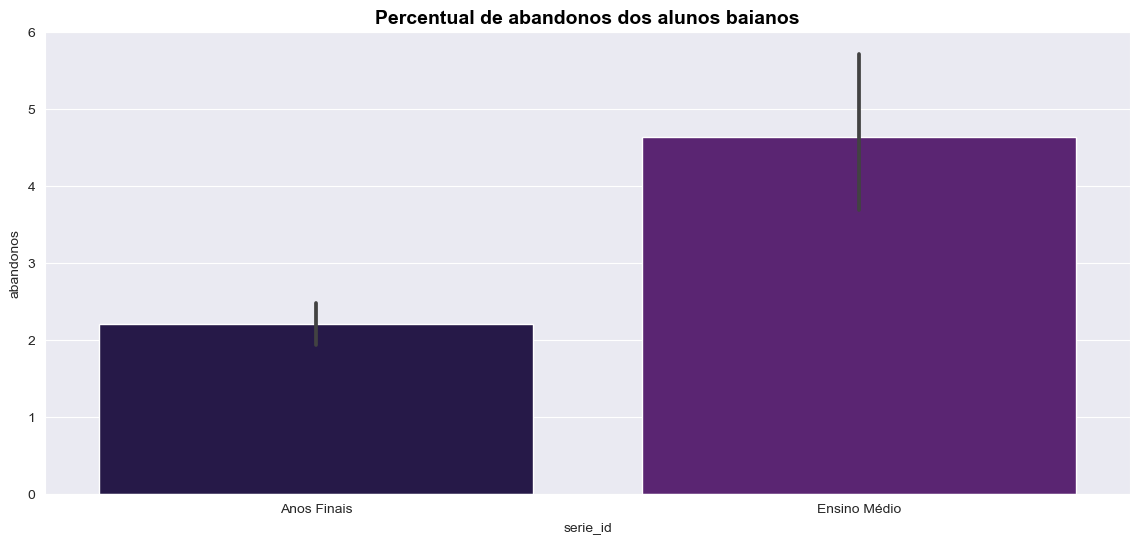

In [21]:
# Criação de gráficos para a tabela "rendimento"
plt.figure(figsize=(14,6))
plt.title("Percentual de aprovações dos alunos baianos", fontsize=14, fontweight='bold', color='black')
plot27 = sns.barplot(data = rendimento, x = rendimento["serie_id"], y=rendimento["aprovados"])
    
plt.figure(figsize=(14,6))
plt.title("Percentual de reprovações dos alunos baianos", fontsize=14, fontweight='bold', color='black')
plot28 = sns.barplot(data = rendimento, x = rendimento["serie_id"], y=rendimento["reprovados"])

plt.figure(figsize=(14,6))
plt.title("Percentual de abandonos dos alunos baianos", fontsize=14, fontweight='bold', color='black')
plot29 = sns.barplot(data = rendimento, x = rendimento["serie_id"], y=rendimento["abandonos"])

#### 2.0.5.2 - INSIGHTS
- Os percentuais de aprovações entre os alunos nos anos finais do Ensino Fundamental e no Ensino Médio são bem similares. Entretanto, nota-se que o percentual de reprovações entre os alunos do primeiro grau é consideravelmente maior. Por outro lado, a ocorrência de abandonos entre os alunos do segundo grau é relativamente frequente.

#### 2.0.5.3 - POR DEPENDÊNCIA

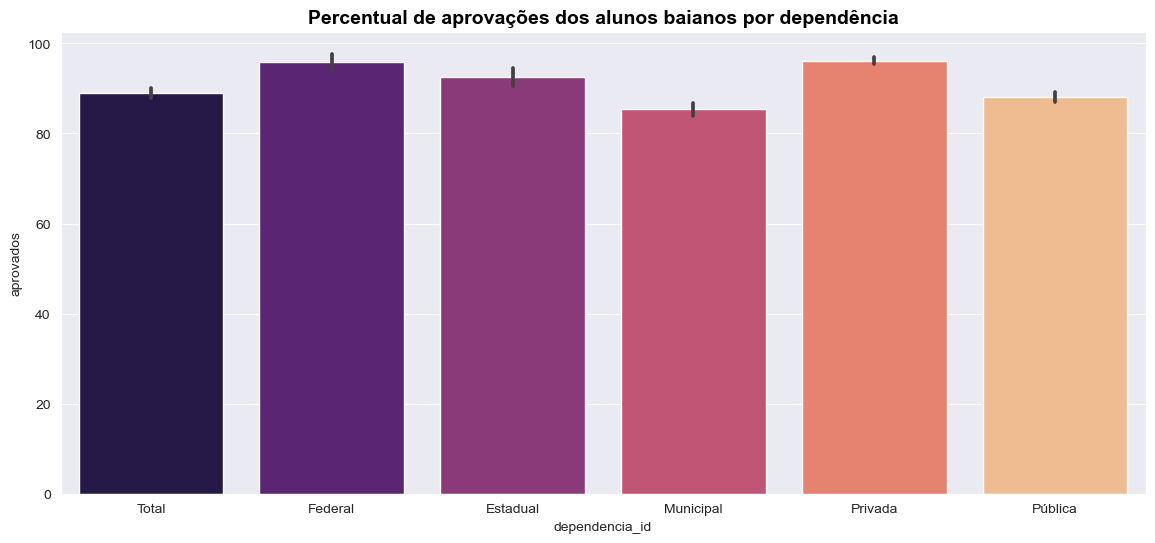

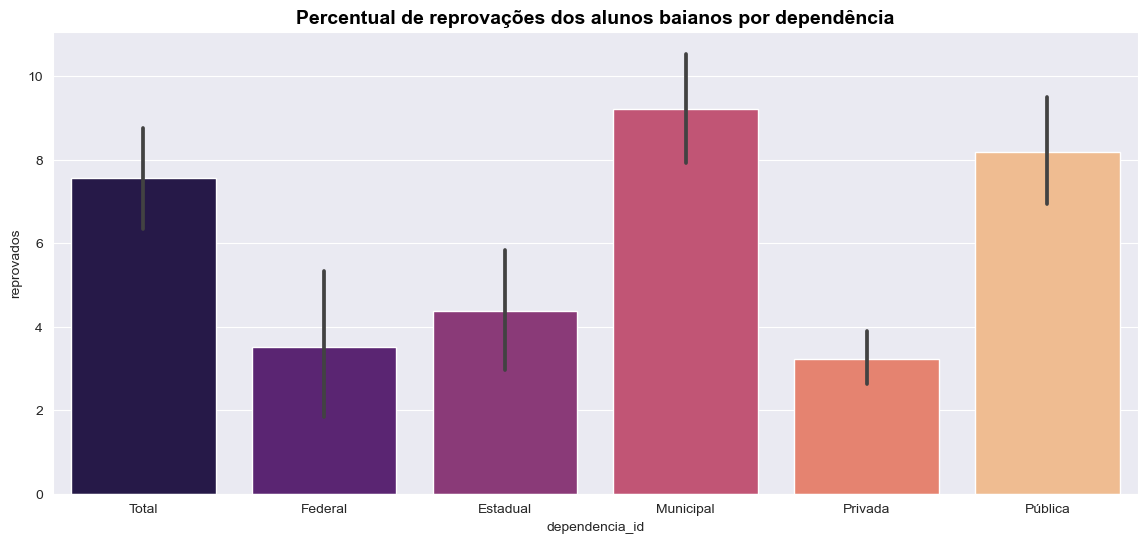

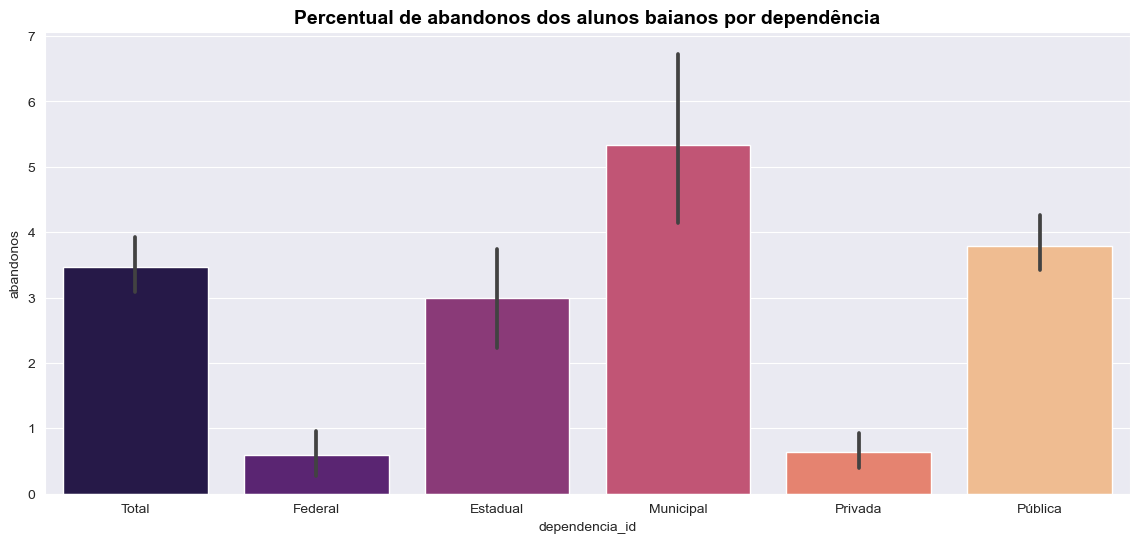

In [22]:
# Criação de gráficos para a tabela "rendimento"
plt.figure(figsize=(14,6))
plt.title("Percentual de aprovações dos alunos baianos por dependência", fontsize=14, fontweight='bold', color='black')
plot30 = sns.barplot(data = rendimento, x = rendimento["dependencia_id"], y=rendimento["aprovados"])

plt.figure(figsize=(14,6))
plt.title("Percentual de reprovações dos alunos baianos por dependência", fontsize=14, fontweight='bold', color='black')
plot31 = sns.barplot(data = rendimento, x = rendimento["dependencia_id"], y=rendimento["reprovados"])

plt.figure(figsize=(14,6))
plt.title("Percentual de abandonos dos alunos baianos por dependência", fontsize=14, fontweight='bold', color='black')
plot32 = sns.barplot(data = rendimento, x = rendimento["dependencia_id"], y=rendimento["abandonos"])

#### 2.0.5.4 - INSIGHTS
- Os percentuais de aprovações são levemente maiores nas escolas públicas e privadas em relação às demais. Já as instituições de ensino municipais e privadas possuem os maiores percentuais de reprovações, seguidas pelas instituições de ensino estaduais;
- Há uma maior disparidade presente no segundo gráfico em relação aos demais.

#### 2.0.5.5 - POR LOCALIZAÇÃO

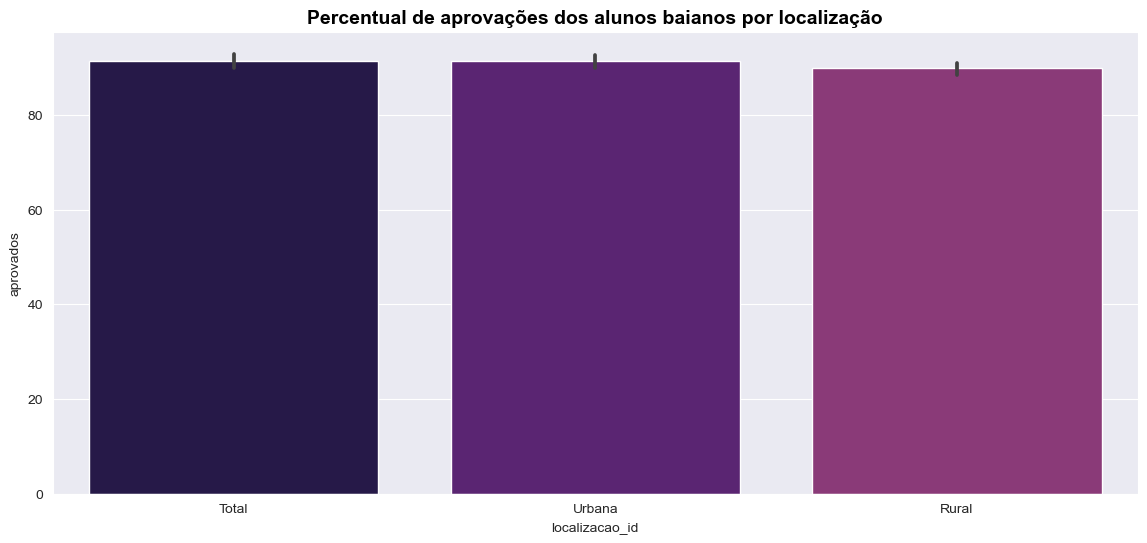

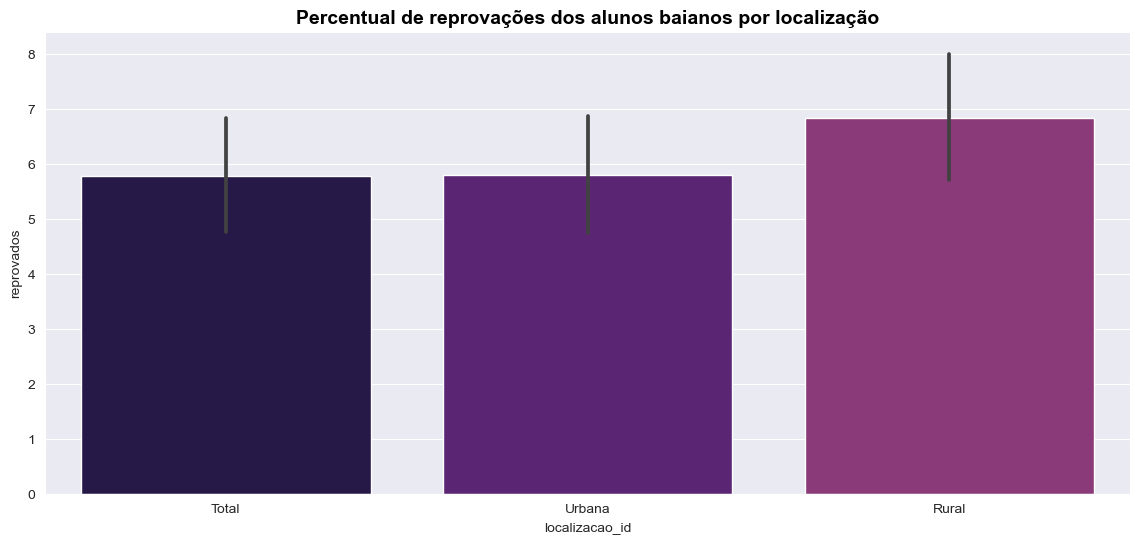

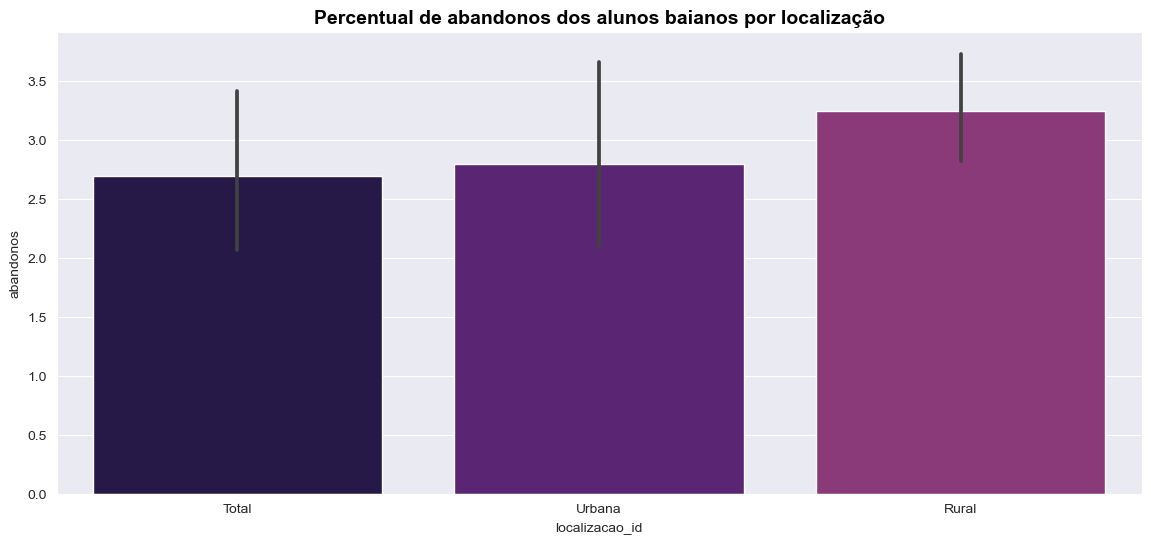

In [23]:
# Criação de gráficos para a tabela "rendimento"
plt.figure(figsize=(14,6))
plt.title("Percentual de aprovações dos alunos baianos por localização", fontsize=14, fontweight='bold', color='black')
plot33 = sns.barplot(data = rendimento, x = rendimento["localizacao_id"], y=rendimento["aprovados"])

plt.figure(figsize=(14,6))
plt.title("Percentual de reprovações dos alunos baianos por localização", fontsize=14, fontweight='bold', color='black')
plot34 = sns.barplot(data = rendimento, x = rendimento["localizacao_id"], y=rendimento["reprovados"])

plt.figure(figsize=(14,6))
plt.title("Percentual de abandonos dos alunos baianos por localização", fontsize=14, fontweight='bold', color='black')
plot35 = sns.barplot(data = rendimento, x = rendimento["localizacao_id"], y=rendimento["abandonos"])

#### 2.0.5.6 - INSIGHTS
- Alunos que estudam em zonas rurais tendem a reprovar ou abandonar com mais frequência a escola em relação a alunos estudantes em zonas urbanas. Além disso, são aprovados um pouco menos.

# 2.0.6 - CONCLUSÕES DA ETAPA

- Foram plotados diversos gráficos a fim de facilitar na compreensão dos dados com os quais estamos trabalhando;
- A partir de tais gráficos, conseguimos identificar alguns padrões, bem como extrair estatísticas valiosas, o que nos ajudará na formulação e validação de hipóteses;
- As ferramentas de visualização de dados Matplotlib e Seaborn foram bastante utilizadas durante o processo.

# 3.0 - FORMULAÇÃO DE HIPÓTESES
Nesta etapa, o foco será em desenvolver hipóteses através dos indicadores e estatísticas que retiramos dos gráficos e tabelas nas duas etapas anteriores, bem como em procurar possíveis razões para os fenômenos observados. 

# 3.1 - O QUE PODE-SE INFERIR?
- Alunos baianos que estudam em escolas privadas ou federais localizadas em zonas urbanas tendem a obter maiores notas e menores índices de reprovações e abandonos em relação àqueles que estudam em escolas das redes pública, municipal ou estadual (sobretudo em zonas rurais). Portanto, podemos inferir que as condições de ensino não são as mesmas para todos;
- Alunos do Ensino Médio possuem maiores notas em relação a alunos dos outros ciclos, mas são mais propensos a reprovações, abandonos ou atraso escolar. Isso pode significar que o grau de dificuldade para tais alunos aumenta conforme o aluno avança de série (seja dentro ou fora do ambiente de ensino;
- Há um grande percentual geral de alunos baianos que possuem algum tipo de dificuldade nas disciplinas Língua Portuguesa e Matemática, sendo que tal deficiência torna-se ainda mais acentuada na última.

# 3.2 - PRINCIPAIS CAUSAS
- Alunos de escolas privadas ou federais nas cidades geralmente têm um ambiente mais favorável para aprender. As escolas costumam ter melhor infraestrutura, mais materiais didáticos e professores bem preparados. Além disso, esses alunos, em muitos casos, vêm de famílias com maior estabilidade financeira, o que ajuda a garantir um acompanhamento mais próximo dos estudos. O acesso à tecnologia também faz diferença, facilitando o aprendizado;
- Por outro lado, nas escolas públicas municipais e estaduais, principalmente nas zonas rurais, a realidade é mais difícil. A falta de recursos, a longa distância até a escola, a precariedade do transporte e até mesmo a necessidade de muitos alunos ajudarem em casa acabam dificultando a continuidade nos estudos. Com menos suporte e condições adversas, muitos acabam desistindo ou enfrentando dificuldades para acompanhar o ritmo das aulas;
- No Ensino Médio, muitos alunos conseguem tirar notas mais altas porque já têm mais experiência com os estudos, desenvolveram melhor a leitura e a escrita e, em muitos casos, estão mais focados no futuro, seja para entrar no mercado de trabalho ou para seguir na faculdade. Nessa fase, eles também costumam ter mais autonomia para aprender;
- Entretanto, nesse ciclo é quando os desafios aumentam de verdade. As matérias ficam mais difíceis, a cobrança cresce e muitos jovens precisam dividir o tempo entre a escola, o trabalho e as responsabilidades em casa. Além disso, a pressão para decidir o futuro pode ser grande, e nem todos têm o apoio necessário para lidar com isso. Sem estrutura e suporte adequados, fica mais fácil se perder no caminho, o que explica os altos índices de reprovação, abandono e atraso escolar - algo explicado no segundo ponto. Isso mostra que, conforme os alunos avançam de série, a escola se torna mais exigente, e aqueles que não recebem o acompanhamento necessário acabam enfrentando mais dificuldades para seguir em frente;
- Muitos alunos na Bahia têm dificuldades em Língua Portuguesa e, principalmente, em Matemática porque não conseguiram construir uma base sólida desde os primeiros anos da escola. Muitas vezes, eles vão avançando de série sem realmente dominar os conteúdos, e isso acaba acumulando ao longo do tempo;
-  No caso da Matemática, o problema fica ainda pior porque a matéria é como uma escada: se o aluno não aprende bem os primeiros degraus, fica muito mais difícil subir. Além disso, a forma como a disciplina é ensinada nem sempre conecta os números com a realidade dos estudantes, tornando tudo mais complicado e distante do dia a dia. Isso não afeta só as notas, mas também a preparação para o futuro, já que tanto a Matemática quanto a Língua Portuguesa são essenciais para o mercado de trabalho e até para resolver problemas do cotidiano.

# 4.0 - POSSÍVEIS SOLUÇÕES
- Faz-se necessária a realização de investimentos direcionados à rede pública de educação por parte do Governo do Estado, representado pela figura da Secretaria da Educação (SEC), de modo a mitigar as desigualdades presentes no ambiente escolar baiano e democratizar o acesso ao ensino;
- Cabe também à Secretaria da Educação, em ação conjunta com a Secretaria de Infraestrutura da Bahia (Seinfra), a realização de ações que tenham o objetivo de conectar os estudantes aos seus respectivos locais de ensino. Tais ações podem envolver a inclusão digital, através da concessão de smartphones e tablets com acesso à internet aos alunos, bem como a construção de novas escolas e circulação de transportes escolares em locais remotos;
- Além disso, o Estado, representado pelas figuras da Secretaria da Assistência e Desenvolvimento Social (SEADES) e da Secretaria do Trabalho, Emprego, Renda e Esporte (SETRE), deve pôr em prática medidas que visem amenizar os impactos gerados pela desigualdade social no país, como a criação de novos programas sociais que visem beneficiar famílias de baixa renda, bem como a geração de novos empregos e a melhora nas condições de trabalho dos já existentes;
- Para que as medidas anteriores operem perfeitamente sem que haja alteração na rotina das crianças e jovens, os órgãos do Governo do Estado devem fiscalizar e proibir quaisquer maneiras de trabalho infantojuvenil, salvo àqueles que possuem representação legal por lei, a exemplo do Jovem Aprendiz;
- Tendo em vista que a saúde mental dos estudantes, sobretudo adolescentes, é algo que comprovadamente pode afetar o desempenho dos mesmos em caso de não haver o devido cuidado, devem-se contratar profissionais especializados na área da Psicologia para os ambientes de ensino, de modo que estes fiquem responsáveis por acompanhar a rotina dos jovens e aconselhá-los em eventuais dificuldades encontradas;
- Por fim, mas não menos importante, deve-se priorizar o aprendizado dos conceitos básicos de cada matéria em detrimento da aprovação dos alunos, sobretudo em séries menores. Dessa forma, garante-se que os estudantes estarão realmente aprendendo e não "decorando para passar de ano".

# CONCLUSÃO DO PROJETO
- Realizado com auxílio do ambiente de desenvolvimento Jupyter Notebook e da linguagem de programação Python, o projeto teve o intuito de analisar dados e indicadores educacionais referentes ao Estado da Bahia, com o intuito de encontrar insights valiosos e eventuais problemas, de modo que estes permitissem a formulação de possíveis soluções de forma conjunta;
- Na primeira etapa, foi realizada a observação inicial e tratamento dos dados, de modo a entender melhor como eles se comportam, bem como encontrar inconsistências nos mesmos que pudessem impedir o andamento do processo;
- Na segunda etapa, foi realizada uma análise exploratória de dados (EDA), com o propósito de aprofundar-se mais nos dados observados anteriormente, extrair insights e formular hipóteses iniciais. Nesse contexto, as bibliotecas Matplotlib e Seaborn foram extremamente importantes;
- Na terceira etapa, novas inferências foram realizadas - de maneira mais profunda -, e as principais causas para as ocorrências observadas foram traçadas por meio da análise dos gráficos aliada a diversas fontes do conhecimento (tanto o já obtido quanto o proveniente de fontes externas);
- Na quarta e última etapa, possíveis soluções para os problemas observados nas etapas anteriores foram formuladas de maneira objetiva e realista, de modo a mitigá-los efetivamente.